In [7]:
import pandas as pd
import numpy as np
from datetime import datetime

In [9]:
# wyscout league dataframe
df = pd.read_csv(r"C:\Users\henri\Desktop\Fotballdata\wyscout\Wyscout_League_Export 31-03-25.csv") # load in your file

In [11]:
col_list = df.columns.to_list()
print(col_list) #print columns

['Unnamed: 0', 'Player', 'Team', 'Team within selected timeframe', 'Position', 'Age', 'Market value', 'Contract expires', 'Matches played', 'Minutes played', 'Goals', 'xG', 'Assists', 'xA', 'Duels per 90', 'Duels won, %', 'Birth country', 'Passport country', 'Foot', 'Height', 'Weight', 'On loan', 'Successful defensive actions per 90', 'Defensive duels per 90', 'Defensive duels won, %', 'Aerial duels per 90', 'Aerial duels won, %', 'Sliding tackles per 90', 'PAdj Sliding tackles', 'Shots blocked per 90', 'Interceptions per 90', 'PAdj Interceptions', 'Fouls per 90', 'Yellow cards', 'Yellow cards per 90', 'Red cards', 'Red cards per 90', 'Successful attacking actions per 90', 'Goals per 90', 'Non-penalty goals', 'Non-penalty goals per 90', 'xG per 90', 'Head goals', 'Head goals per 90', 'Shots', 'Shots per 90', 'Shots on target, %', 'Goal conversion, %', 'Assists per 90', 'Crosses per 90', 'Accurate crosses, %', 'Crosses from left flank per 90', 'Accurate crosses from left flank, %', 'Cro

In [13]:
class Preprocessing:
    def __init__(self, df, leagues=None, positions=None, min_minutes=700):
        """
        df: DataFrame som skal filtreres.
        leagues: List of leagues. Default is 'England Premier League 2024-25'.
        positions: List with positions to be filtered for
        min_minutes: Minimum number of minutes
        """
        if positions is not None and not isinstance(positions, list):
            raise ValueError("positions must be a list or None")
        self.df = df
        self.leagues = leagues if leagues else ['England Premier League 2024-25']
        self.positions = positions
        self.min_minutes = min_minutes
        self.filtered_df = None

    def filter_data(self):
        """Filtrerer DataFrame basert på angitte kriterier."""
        df = self.df.copy()

        # change column names
        df = df.rename(columns={'Team within selected timeframe': 'squad'})
        df = df.rename(columns={'Team': 'club today'})
        df.columns = df.columns.str.lower()

        # Filer leagues
        df = df[df['league'].isin(self.leagues)]

        # Konverter 'contract expires' to datetime og calculate moths left
        df['contract expires'] = pd.to_datetime(df['contract expires'], errors='coerce')
        today = datetime.today()

        df['contract months left'] = df['contract expires'].apply(
        lambda x: 0 if pd.isna(x) else max(0, int((x.year - today.year) * 12 + (x.month - today.month))))

        # List relevant columns to keep
        columns_to_keep = [
            'player', 'club today', 'squad','league', 'position', 'age', 'market value', 'contract months left', 
            'matches played', 'minutes played', 'goals', 'xg', 'assists', 'xa', 
            'duels per 90', 'duels won, %', 'birth country', 'passport country', 'foot', 'height', 
            'weight', 'on loan', 'successful defensive actions per 90', 'defensive duels per 90', 
            'defensive duels won, %', 'aerial duels per 90', 'aerial duels won, %', 'shots blocked per 90', 'interceptions per 90',  
            'non-penalty goals per 90', 
            'xg per 90', 'head goals per 90', 'shots per 90', 'shots on target, %', 
            'goal conversion, %', 'assists per 90', 'crosses per 90', 'accurate crosses, %', 
            'crosses from left flank per 90', 'accurate crosses from left flank, %', 
            'crosses from right flank per 90', 'accurate crosses from right flank, %', 
            'crosses to goalie box per 90', 'dribbles per 90', 'successful dribbles, %', 
            'offensive duels per 90', 'offensive duels won, %', 'touches in box per 90', 
            'progressive runs per 90', 'accelerations per 90', 'received passes per 90', 
            'received long passes per 90', 'fouls suffered per 90', 'passes per 90', 'accurate passes, %', 
            'forward passes per 90', 'accurate forward passes, %', 'back passes per 90', 
            'accurate back passes, %', 'lateral passes per 90', 'accurate lateral passes, %', 
            'short / medium passes per 90', 'accurate short / medium passes, %', 'long passes per 90', 
            'accurate long passes, %', 'average pass length, m', 'average long pass length, m', 
            'xa per 90', 'shot assists per 90', 'second assists per 90', 'third assists per 90','key passes per 90', 
            'passes to final third per 90', 'accurate passes to final third, %', 
            'passes to penalty area per 90', 'accurate passes to penalty area, %', 
            'through passes per 90', 'accurate through passes, %', 'deep completions per 90', 
            'deep completed crosses per 90', 'progressive passes per 90', 'accurate progressive passes, %', 
            'main position'
        ]
        
        # Keep list of columns
        df = df[columns_to_keep]

        # Filtrer basert på posisjoner 
        df = df[df['main position'].isin(self.positions)]

        # Filtrer basert på minimum minutter spilt
        df = df[df['minutes played'] > self.min_minutes]

        self.filtered_df = df
        return self.filtered_df
#leagues=['Norway Eliteserien 2024','Sweden Allsvenskan 2024','Denmark Superliga 2024-25']
leagues = ['Spain La Liga 2024-25', 'Italy Serie A 2024-25', 'France Ligue 1 2024-25', 'Germany Bundesliga 2024-25', 'England Premier League 2024-25']
# Define the positions to filter
positions = ['RW', 'LW', 'RAMF', 'LAMF','RWF', 'LWF']
min_minutes=900  # can be adjusted
preprocessor = Preprocessing(df, leagues=leagues, positions=positions, min_minutes=min_minutes)
filtered_df = preprocessor.filter_data()

In [15]:
filtered_df.head()

,player,club today,squad,league,position,age,market value,contract months left,matches played,minutes played,...,"accurate passes to final third, %",passes to penalty area per 90,"accurate passes to penalty area, %",through passes per 90,"accurate through passes, %",deep completions per 90,deep completed crosses per 90,progressive passes per 90,"accurate progressive passes, %",main position
41383,R. Doan,Freiburg,Freiburg,Germany Bundesliga 2024-25,"RAMF, RW",26.0,18000000,25,27,2393,...,63.29,2.41,42.19,0.60,25.00,0.68,0.83,5.42,73.61,RAMF
41408,Lee Jae-Sung,Mainz 05,Mainz 05,Germany Bundesliga 2024-25,"LWF, AMF",32.0,2500000,13,26,2255,...,64.06,1.65,55.00,0.16,50.00,0.78,0.49,3.37,62.20,LWF
41417,T. Bischof,Hoffenheim,Hoffenheim,Germany Bundesliga 2024-25,"RAMF, LDMF, LCMF",19.0,3500000,1,25,2194,...,74.07,2.63,60.94,0.62,46.67,1.11,0.53,6.81,71.69,RAMF
41449,V. Grifo,Freiburg,Freiburg,Germany Bundesliga 2024-25,"LAMF, LW",31.0,9000000,0,27,2023,...,63.50,3.78,51.76,1.29,27.59,1.33,0.85,7.70,77.46,LAMF
41455,P. Nebel,Mainz 05,Mainz 05,Germany Bundesliga 2024-25,"RWF, AMF",22.0,3500000,25,25,1972,...,61.19,3.15,50.00,0.38,25.00,0.72,0.96,4.21,70.45,RWF


In [9]:
len(filtered_df)

194

In [17]:
filtered_df["main position"].value_counts()

main position
RAMF    53
LAMF    51
LW      29
RW      29
LWF     17
RWF     15
Name: count, dtype: int64

In [13]:
for name in filtered_df[filtered_df["main position"].isin(["RWF", "LWF"])]["player"]:
    print(name)

Lee Jae-Sung
P. Nebel
A. Claude-Maurice
O. Afolayan
M. Guilavogui
N. Weißhaupt
M. Politano
K. Kvaratskhelia
David Neres
Iago Aspas
W. Swedberg
Z. Davitashvili
Z. Aboukhlal
Y. Gboho
B. Barcola
O. Dembélé
Lee Kang-In
S. Babicka
R. Del Castillo
S. Diop
Matheus Cunha
A. Gordon
L. Trossard
E. Eze
Son Heung-Min
B. Johnson
J. Murphy
Gabriel Martinelli
J. Bellegarde
B. Saka
H. Barnes
Gonçalo Guedes


In [69]:
for name in filtered_df[filtered_df["main position"].isin(["LAMF", "RAMF"])]["player"]:
    print(name)

R. Doan
T. Bischof
V. Grifo
M. Olise
R. Hack
J. Gittens
L. Sané
K. Adeyemi
K. Coman
F. Honorat
Léo Scienza
S. Gnabry
Gabriel Strefezza
M. Zaccagni
K. Yıldız
Rafael Leão
D. Man
C. Pulišić
G. Isaksen
D. Ndoye
A. Fadera
A. Zanoli
M. Cancellieri
Y. Musah
A. Colpani
R. Orsolini
V. Mihăilă
N. González
Francisco Conceicão
P. Almqvist
Assane Diao
B. Domínguez
R. Sottil
S. Chukwueze
D. Lukébakio
Carlos Vicente
Iñaki Williams
Raphinha
Lamine Yamal
Alberto Moleiro
Jorge de Frutos
Álvaro García
Juan Cruz
Nico Williams
Álex Berenguer
Rodrygo
Bryan Gil
A. Ezzalzouli
Sandro Ramírez
Pablo Fornals
Y. Asprilla
Ferrán Torres
C. Ejuke
J. Ito
M. Greenwood
K. Nakamura
M. Simon
M. Akliouche
F. El Melali
E. Ben Seghir
J. Allevinah
A. Golovin
A. Nordin
O. Sahraoui
S. Thomas
E. Nuamah
M. Pereira Lage
E. Zhegrova
R. Cabella
A. Sima
T. Coulibaly
B. Mbeumo
Mohamed Salah
A. Semenyo
A. Iwobi
K. Mitoma
I. Ndiaye
A. Elanga
C. Hudson-Odoi
L. Díaz
A. Garnacho
K. Schade
Pedro Neto
Dango Ouattara
M. Tavernier
J. Harrison


In [71]:
for name in filtered_df[filtered_df["main position"].isin(["RW", "LW"])]["player"]:
    print(name)

X. Simons
C. Führich
M. Götze
A. Nusa
J. Leweling
C. Baumgartner
A. Knauff
N. Zortea
Tete Morente
F. Miretti
S. Pierotti
S. El Shaarawy
M. Felici
Luis Rioja
Álex Baena
Sergio Gómez
Diego López
Sergi Darder
Rubén García
Jofre Carreras
Raúl Moro
T. Kubo
D. Brašanac
Bryan Zaragoza
Adri Embarba
Carles Pérez
Yéremy Pino
G. Simeone
Dani Raba
A. Tuhami
Robert Navarro
Samuel Lino
V. Tsygankov
C. Gallagher
Álvaro Tejero
Óscar Rodríguez
Brahim Diaz
Carlos Martín
Iván Sánchez
Álex Sola
Carles Aleñà
Ander Barrenetxea
S. Becker
G. Perrin
H. Traoré
D. Bakwa
S. Nanasi
R. Cherki
J. Casimir
I. Soumaré
M. Fofana
A. Zaroury
A. Joujou
M. Kudus
I. Sarr
T. Dibling
Savinho
J. Doku


In [19]:
# this part is adjusting for possession, and can be skipped
from fuzzywuzzy import process
from datetime import datetime

class RetrievePossession:
    def __init__(self, path):
        """Leser inn data og forbereder den for matching."""
        self.df_poss = pd.read_csv(path, encoding="ISO-8859-1")
        self.df_poss.columns = self.df_poss.columns.str.lower()
        self.df_poss['poss_decimal'] = self.df_poss['possession'] / 100 

    def match_teams(self, team_name, possibilities, threshold=80):
        """Bruker fuzzy matching for å finne nærmeste match for hvert lag."""
        match = process.extractOne(team_name, possibilities)
        if match and match[1] >= threshold:
            return match[0]
        return team_name  # Returnerer originalnavn hvis ingen match finnes

    def merge_possession_data(self, processed_df):
        """
        Matcher lag i df med df_poss, og legger til poss_decimal.
        Returnerer en ny DataFrame.
        """
        poss_teams = self.df_poss['squad'].unique()

        # Bruk fuzzy matching på lagene i df
        processed_df['squad_matched'] = processed_df['squad'].apply(lambda x: self.match_teams(x, poss_teams))

        # Merge basert på den matchede 'squad'
        merged_df = pd.merge(processed_df, self.df_poss[['squad', 'poss_decimal']], 
                             left_on='squad_matched', right_on='squad', how='left')

        # Fjern den midlertidige 'squad_matched'
        merged_df = merged_df.drop(columns=['squad_matched', 'squad_y'])

        # Endre navnet på 'squad_x' til 'squad'
        merged_df = merged_df.rename(columns={'squad_x': 'squad'})

        return merged_df

In [21]:
# Filsti til possession-data
path = r"C:\Users\henri\Desktop\Fotballdata\Possession-stats\possession_stats.csv"

# Initialiser klassen
normalizer = RetrievePossession(path)

# Anta at du allerede har en filtrert DataFrame 'processed_df' med spillere
merged_df = normalizer.merge_possession_data(filtered_df)

In [19]:
merged_df.head()

,player,club today,squad,league,position,age,market value,contract months left,matches played,minutes played,...,passes to penalty area per 90,"accurate passes to penalty area, %",through passes per 90,"accurate through passes, %",deep completions per 90,deep completed crosses per 90,progressive passes per 90,"accurate progressive passes, %",main position,poss_decimal
0,R. Doan,Freiburg,Freiburg,Germany Bundesliga 2024-25,"RAMF, RW",26.0,18000000,26,27,2393,...,2.41,42.19,0.60,25.00,0.68,0.83,5.42,73.61,RAMF,0.473
1,Lee Jae-Sung,Mainz 05,Mainz 05,Germany Bundesliga 2024-25,"LWF, AMF",32.0,2500000,14,26,2255,...,1.65,55.00,0.16,50.00,0.78,0.49,3.37,62.20,LWF,0.494
2,T. Bischof,Hoffenheim,Hoffenheim,Germany Bundesliga 2024-25,"RAMF, LDMF, LCMF",19.0,3500000,2,25,2194,...,2.63,60.94,0.62,46.67,1.11,0.53,6.81,71.69,RAMF,0.494
3,V. Grifo,Freiburg,Freiburg,Germany Bundesliga 2024-25,"LAMF, LW",31.0,9000000,0,27,2023,...,3.78,51.76,1.29,27.59,1.33,0.85,7.70,77.46,LAMF,0.473
4,P. Nebel,Mainz 05,Mainz 05,Germany Bundesliga 2024-25,"RWF, AMF",22.0,3500000,26,25,1972,...,3.15,50.00,0.38,25.00,0.72,0.96,4.21,70.45,RWF,0.494


In [23]:
import pandas as pd

class NormalizePossession:
    def __init__(self, df):
        """
        Initialiserer klassen med en kopi av DataFrame for å bevare originalen.
        """
        self.df = df.copy()  # Lag en kopi for å unngå endring av originalen

    def possession_adjust_def(self, value, team_possession):
        """Justerer en (volum)defensiv metric basert på motstanderens besittelse."""
        if pd.isnull(team_possession) or team_possession >= 1:
            return value
        opp_poss = 1 - team_possession
        return value if opp_poss == 0 else value * (0.50 / opp_poss)

    def possession_adjust_off(self, value, team_possession):
        """Justerer en (volum)offensiv metric basert på eget lags besittelse."""
        if pd.isnull(team_possession) or team_possession == 0:
            return value
        return value * (0.50 / team_possession)

    def apply_adjustments(self):
        """
        Justerer eksisterende kolonner direkte for ballbesittelse, uten å lage nye kolonner.
        """
        def_def_cols = [
            'defensive duels per 90', 'interceptions per 90', 'fouls per 90',
            'aerial duels per 90',
        ]

        def_off_cols = [
            'non-penalty goals per 90', 'xg per 90', 'head goals per 90', 'shots per 90',
            'assists per 90', 'crosses per 90', 'dribbles per 90', 'offensive duels per 90',
            'touches in box per 90', 'progressive runs per 90', 'accelerations per 90',
            'received passes per 90', 'received long passes per 90', 'fouls suffered per 90',
            'passes per 90', 'forward passes per 90', 'back passes per 90',
            'passes to final third per 90', 'progressive passes per 90',
            'goals per 90', 'non-penalty goals', 'lateral passes per 90', 'short / medium passes per 90', 
            'long passes per 90','xa per 90', 'shot assists per 90', 
            'second assists per 90', 'third assists per 90', 'key passes per 90',  'passes to penalty area per 90', 'through passes per 90',
            'deep completions per 90', 'deep completed crosses per 90', 'penalties taken',
        ]

        # Juster defensive metrics direkte
        for col in def_def_cols:
            if col in self.df.columns:
                self.df[col] = self.df.apply(
                    lambda row: self.possession_adjust_def(row[col], row["poss_decimal"]),
                    axis=1
                )

        # Juster offensive metrics direkte
        for col in def_off_cols:
            if col in self.df.columns:
                self.df[col] = self.df.apply(
                    lambda row: self.possession_adjust_off(row[col], row["poss_decimal"]),
                    axis=1
                )

        # Avrund alle kolonner som er justert (hvis ønskelig)
        cols_to_round = def_def_cols + def_off_cols
        existing_cols = [col for col in cols_to_round if col in self.df.columns]
        self.df[existing_cols] = self.df[existing_cols].round(2)

        return self.df


In [25]:
# Initialiser klassen med merged_df
adjuster = NormalizePossession(merged_df)

# Utfør justeringene og returner den oppdaterte DataFrame
merged_df = adjuster.apply_adjustments()

In [269]:
merged_df.head()

,player,club today,squad,league,position,age,market value,contract months left,matches played,minutes played,...,passes to penalty area per 90,"accurate passes to penalty area, %",through passes per 90,"accurate through passes, %",deep completions per 90,deep completed crosses per 90,progressive passes per 90,"accurate progressive passes, %",main position,poss_decimal
0,R. Doan,Freiburg,Freiburg,Germany Bundesliga 2024-25,"RAMF, RW",26.0,18000000,26,27,2393,...,2.55,42.19,0.63,25.00,0.72,0.88,5.73,73.61,RAMF,0.473
1,Lee Jae-Sung,Mainz 05,Mainz 05,Germany Bundesliga 2024-25,"LWF, AMF",32.0,2500000,14,26,2255,...,1.67,55.00,0.16,50.00,0.79,0.50,3.41,62.20,LWF,0.494
2,T. Bischof,Hoffenheim,Hoffenheim,Germany Bundesliga 2024-25,"RAMF, LDMF, LCMF",19.0,3500000,2,25,2194,...,2.66,60.94,0.63,46.67,1.12,0.54,6.89,71.69,RAMF,0.494
3,V. Grifo,Freiburg,Freiburg,Germany Bundesliga 2024-25,"LAMF, LW",31.0,9000000,0,27,2023,...,4.00,51.76,1.36,27.59,1.41,0.90,8.14,77.46,LAMF,0.473
4,P. Nebel,Mainz 05,Mainz 05,Germany Bundesliga 2024-25,"RWF, AMF",22.0,3500000,26,25,1972,...,3.19,50.00,0.38,25.00,0.73,0.97,4.26,70.45,RWF,0.494


In [27]:
col_list = merged_df.columns.to_list()
print(col_list) #print columns

['player', 'club today', 'squad', 'league', 'position', 'age', 'market value', 'contract months left', 'matches played', 'minutes played', 'goals', 'xg', 'assists', 'xa', 'duels per 90', 'duels won, %', 'birth country', 'passport country', 'foot', 'height', 'weight', 'on loan', 'successful defensive actions per 90', 'defensive duels per 90', 'defensive duels won, %', 'aerial duels per 90', 'aerial duels won, %', 'shots blocked per 90', 'interceptions per 90', 'non-penalty goals per 90', 'xg per 90', 'head goals per 90', 'shots per 90', 'shots on target, %', 'goal conversion, %', 'assists per 90', 'crosses per 90', 'accurate crosses, %', 'crosses from left flank per 90', 'accurate crosses from left flank, %', 'crosses from right flank per 90', 'accurate crosses from right flank, %', 'crosses to goalie box per 90', 'dribbles per 90', 'successful dribbles, %', 'offensive duels per 90', 'offensive duels won, %', 'touches in box per 90', 'progressive runs per 90', 'accelerations per 90', 'r

In [29]:
len(col_list)

84

In [31]:
# Lagre kontekstkolonnene før bearbeiding
context_cols = ['player', 'squad', 'league','club today', 'age', 'market value', 'main position', 'contract months left', 'minutes played']
context_data = merged_df[context_cols]

In [33]:
# Velg kun numeriske kolonner
df_clean = merged_df.select_dtypes(include=['number'])

In [35]:
# Finn rader med minst én NaN i numeriske kolonner
nan_rows = df_clean[df_clean.isna().any(axis=1)]

# Antall rader med NaNs
print(f"Rader med NaNs: {len(nan_rows)}")

Rader med NaNs: 0


In [37]:
col_list = df_clean.columns.to_list()
print(col_list) #print columns

['age', 'market value', 'contract months left', 'matches played', 'minutes played', 'goals', 'xg', 'assists', 'xa', 'duels per 90', 'duels won, %', 'height', 'weight', 'successful defensive actions per 90', 'defensive duels per 90', 'defensive duels won, %', 'aerial duels per 90', 'aerial duels won, %', 'shots blocked per 90', 'interceptions per 90', 'non-penalty goals per 90', 'xg per 90', 'head goals per 90', 'shots per 90', 'shots on target, %', 'goal conversion, %', 'assists per 90', 'crosses per 90', 'accurate crosses, %', 'crosses from left flank per 90', 'accurate crosses from left flank, %', 'crosses from right flank per 90', 'accurate crosses from right flank, %', 'crosses to goalie box per 90', 'dribbles per 90', 'successful dribbles, %', 'offensive duels per 90', 'offensive duels won, %', 'touches in box per 90', 'progressive runs per 90', 'accelerations per 90', 'received passes per 90', 'received long passes per 90', 'fouls suffered per 90', 'passes per 90', 'accurate pass

In [101]:
df_clean.head()

,age,market value,contract months left,matches played,minutes played,goals,xg,assists,xa,duels per 90,...,"accurate passes to final third, %",passes to penalty area per 90,"accurate passes to penalty area, %",through passes per 90,"accurate through passes, %",deep completions per 90,deep completed crosses per 90,progressive passes per 90,"accurate progressive passes, %",poss_decimal
0,26.0,18000000,26,27,2393,8,5.12,6,2.20,20.35,...,63.29,2.55,42.19,0.63,25.00,0.72,0.88,5.73,73.61,0.473
1,32.0,2500000,14,26,2255,6,4.66,5,2.39,16.37,...,64.06,1.67,55.00,0.16,50.00,0.79,0.50,3.41,62.20,0.494
2,19.0,3500000,2,25,2194,4,1.85,2,3.59,20.88,...,74.07,2.66,60.94,0.63,46.67,1.12,0.54,6.89,71.69,0.494
3,31.0,9000000,0,27,2023,8,7.82,5,5.97,12.32,...,63.50,4.00,51.76,1.36,27.59,1.41,0.90,8.14,77.46,0.473
4,22.0,3500000,26,25,1972,8,4.40,3,2.64,22.46,...,61.19,3.19,50.00,0.38,25.00,0.73,0.97,4.26,70.45,0.494


In [39]:
df_clean['share forward_passes, %'] = df_clean['forward passes per 90'] / df_clean['passes per 90']
df_clean['share lateral_passes, %'] = df_clean['lateral passes per 90'] / df_clean['passes per 90']
df_clean['share back_passes, %'] = df_clean['back passes per 90'] / df_clean['passes per 90']
df_clean['share progressive_passes, %'] = df_clean['progressive passes per 90'] / df_clean['passes per 90']
df_clean['share key_passes, %'] = df_clean['key passes per 90'] / df_clean['passes per 90']
df_clean['xg per shot'] = df_clean['xg per 90'] / df_clean['shots per 90']
df_clean['dribbleratio'] = df_clean['dribbles per 90'] / df_clean['received passes per 90']

In [41]:
col_list = df_clean.columns.to_list()
print(col_list) #print columns

['age', 'market value', 'contract months left', 'matches played', 'minutes played', 'goals', 'xg', 'assists', 'xa', 'duels per 90', 'duels won, %', 'height', 'weight', 'successful defensive actions per 90', 'defensive duels per 90', 'defensive duels won, %', 'aerial duels per 90', 'aerial duels won, %', 'shots blocked per 90', 'interceptions per 90', 'non-penalty goals per 90', 'xg per 90', 'head goals per 90', 'shots per 90', 'shots on target, %', 'goal conversion, %', 'assists per 90', 'crosses per 90', 'accurate crosses, %', 'crosses from left flank per 90', 'accurate crosses from left flank, %', 'crosses from right flank per 90', 'accurate crosses from right flank, %', 'crosses to goalie box per 90', 'dribbles per 90', 'successful dribbles, %', 'offensive duels per 90', 'offensive duels won, %', 'touches in box per 90', 'progressive runs per 90', 'accelerations per 90', 'received passes per 90', 'received long passes per 90', 'fouls suffered per 90', 'passes per 90', 'accurate pass

In [43]:
features= ['successful defensive actions per 90','aerial duels per 90','duels per 90', 'duels won, %','non-penalty goals per 90', 'xg per 90', 'head goals per 90', 'shots per 90', 'shots on target, %', 'goal conversion, %', 'assists per 90', 'crosses per 90', 'accurate crosses, %','crosses to goalie box per 90', 'dribbles per 90', 'successful dribbles, %', 'offensive duels per 90', 'offensive duels won, %', 'touches in box per 90', 'progressive runs per 90', 'accelerations per 90', 'received passes per 90', 'received long passes per 90', 'fouls suffered per 90', 'passes per 90', 'accurate passes, %', 'forward passes per 90', 'accurate forward passes, %', 'back passes per 90','accurate back passes, %', 'lateral passes per 90', 'accurate lateral passes, %', 'short / medium passes per 90', 'accurate short / medium passes, %', 'long passes per 90', 'accurate long passes, %', 'average pass length, m', 'average long pass length, m', 'xa per 90', 'shot assists per 90', 'second assists per 90', 'third assists per 90', 'key passes per 90', 'passes to final third per 90', 'accurate passes to final third, %', 'passes to penalty area per 90', 'accurate passes to penalty area, %', 'through passes per 90', 'accurate through passes, %', 'deep completions per 90', 'deep completed crosses per 90', 'progressive passes per 90', 'accurate progressive passes, %','share forward_passes, %', 'share lateral_passes, %', 'share back_passes, %', 'share progressive_passes, %', 'share key_passes, %','xg per shot','dribbleratio']

In [45]:
len(features)

60

In [47]:
features

['successful defensive actions per 90',
 'aerial duels per 90',
 'duels per 90',
 'duels won, %',
 'non-penalty goals per 90',
 'xg per 90',
 'head goals per 90',
 'shots per 90',
 'shots on target, %',
 'goal conversion, %',
 'assists per 90',
 'crosses per 90',
 'accurate crosses, %',
 'crosses to goalie box per 90',
 'dribbles per 90',
 'successful dribbles, %',
 'offensive duels per 90',
 'offensive duels won, %',
 'touches in box per 90',
 'progressive runs per 90',
 'accelerations per 90',
 'received passes per 90',
 'received long passes per 90',
 'fouls suffered per 90',
 'passes per 90',
 'accurate passes, %',
 'forward passes per 90',
 'accurate forward passes, %',
 'back passes per 90',
 'accurate back passes, %',
 'lateral passes per 90',
 'accurate lateral passes, %',
 'short / medium passes per 90',
 'accurate short / medium passes, %',
 'long passes per 90',
 'accurate long passes, %',
 'average pass length, m',
 'average long pass length, m',
 'xa per 90',
 'shot assist

In [49]:
import numpy as np

# Korrelasjonsmatrise
corr_matrix = df_clean[features].corr().abs()

# Velg øvre trekant for å unngå duplikater
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Finn features med korrelasjon > 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Fjern de som korrelerer for mye
features = [f for f in features if f not in to_drop]

In [51]:
to_drop

['passes per 90',
 'short / medium passes per 90',
 'accurate short / medium passes, %',
 'share key_passes, %',
 'dribbleratio']

In [53]:
print("Features:", ", ".join(features))

Features: successful defensive actions per 90, aerial duels per 90, duels per 90, duels won, %, non-penalty goals per 90, xg per 90, head goals per 90, shots per 90, shots on target, %, goal conversion, %, assists per 90, crosses per 90, accurate crosses, %, crosses to goalie box per 90, dribbles per 90, successful dribbles, %, offensive duels per 90, offensive duels won, %, touches in box per 90, progressive runs per 90, accelerations per 90, received passes per 90, received long passes per 90, fouls suffered per 90, accurate passes, %, forward passes per 90, accurate forward passes, %, back passes per 90, accurate back passes, %, lateral passes per 90, accurate lateral passes, %, long passes per 90, accurate long passes, %, average pass length, m, average long pass length, m, xa per 90, shot assists per 90, second assists per 90, third assists per 90, key passes per 90, passes to final third per 90, accurate passes to final third, %, passes to penalty area per 90, accurate passes to 

In [53]:
features

['successful defensive actions per 90',
 'aerial duels per 90',
 'duels per 90',
 'duels won, %',
 'non-penalty goals per 90',
 'xg per 90',
 'head goals per 90',
 'shots per 90',
 'shots on target, %',
 'goal conversion, %',
 'assists per 90',
 'crosses per 90',
 'accurate crosses, %',
 'crosses to goalie box per 90',
 'dribbles per 90',
 'successful dribbles, %',
 'offensive duels per 90',
 'offensive duels won, %',
 'touches in box per 90',
 'progressive runs per 90',
 'accelerations per 90',
 'received passes per 90',
 'received long passes per 90',
 'fouls suffered per 90',
 'accurate passes, %',
 'forward passes per 90',
 'accurate forward passes, %',
 'back passes per 90',
 'accurate back passes, %',
 'lateral passes per 90',
 'accurate lateral passes, %',
 'long passes per 90',
 'accurate long passes, %',
 'average pass length, m',
 'average long pass length, m',
 'xa per 90',
 'shot assists per 90',
 'second assists per 90',
 'third assists per 90',
 'key passes per 90',
 'pas

In [55]:
len(features)

55

In [55]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

# 1. Hent ut bare features
X = df_clean[features]

# 2. Skaler verdiene med MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# 3. Beregn variansen etter MinMax-skalering
variances = X_scaled_df.var()
variances_sorted = variances.sort_values()

print("📊 Varians etter MinMax-skalering:\n")
print(variances_sorted)

# 4. Sett terskel og finn features med lav varians
threshold = 0.02
low_variance_features = variances[variances < threshold].index.tolist()

print(f"\n⚠️ Features med lav varians (< {threshold}):")
print(low_variance_features)

📊 Varians etter MinMax-skalering:

head goals per 90                      0.016989
accurate crosses, %                    0.017720
accurate progressive passes, %         0.017796
accurate long passes, %                0.019677
offensive duels won, %                 0.021719
successful dribbles, %                 0.022304
accurate passes to final third, %      0.022672
xg per shot                            0.024754
fouls suffered per 90                  0.025433
non-penalty goals per 90               0.026133
progressive runs per 90                0.026339
third assists per 90                   0.026749
back passes per 90                     0.027485
shots on target, %                     0.027842
share lateral_passes, %                0.028102
aerial duels per 90                    0.029107
shots per 90                           0.029723
deep completions per 90                0.029972
progressive passes per 90              0.030526
accelerations per 90                   0.030641
duels

In [57]:
low_variance_features

['head goals per 90',
 'accurate crosses, %',
 'accurate long passes, %',
 'accurate progressive passes, %']

In [59]:
#Fjern disse features fra *uskalert* originaldata
features_filtered = [f for f in features if f not in low_variance_features]

In [61]:
features_filtered

['successful defensive actions per 90',
 'aerial duels per 90',
 'duels per 90',
 'duels won, %',
 'non-penalty goals per 90',
 'xg per 90',
 'shots per 90',
 'shots on target, %',
 'goal conversion, %',
 'assists per 90',
 'crosses per 90',
 'crosses to goalie box per 90',
 'dribbles per 90',
 'successful dribbles, %',
 'offensive duels per 90',
 'offensive duels won, %',
 'touches in box per 90',
 'progressive runs per 90',
 'accelerations per 90',
 'received passes per 90',
 'received long passes per 90',
 'fouls suffered per 90',
 'accurate passes, %',
 'forward passes per 90',
 'accurate forward passes, %',
 'back passes per 90',
 'accurate back passes, %',
 'lateral passes per 90',
 'accurate lateral passes, %',
 'long passes per 90',
 'average pass length, m',
 'average long pass length, m',
 'xa per 90',
 'shot assists per 90',
 'second assists per 90',
 'third assists per 90',
 'key passes per 90',
 'passes to final third per 90',
 'accurate passes to final third, %',
 'passes

In [63]:
len(features_filtered)

51

In [65]:
print("Features:", ", ".join(features_filtered))

Features: successful defensive actions per 90, aerial duels per 90, duels per 90, duels won, %, non-penalty goals per 90, xg per 90, shots per 90, shots on target, %, goal conversion, %, assists per 90, crosses per 90, crosses to goalie box per 90, dribbles per 90, successful dribbles, %, offensive duels per 90, offensive duels won, %, touches in box per 90, progressive runs per 90, accelerations per 90, received passes per 90, received long passes per 90, fouls suffered per 90, accurate passes, %, forward passes per 90, accurate forward passes, %, back passes per 90, accurate back passes, %, lateral passes per 90, accurate lateral passes, %, long passes per 90, average pass length, m, average long pass length, m, xa per 90, shot assists per 90, second assists per 90, third assists per 90, key passes per 90, passes to final third per 90, accurate passes to final third, %, passes to penalty area per 90, accurate passes to penalty area, %, through passes per 90, accurate through passes, 

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

# Select features and standardize
X = df_clean[features_filtered]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA - reducing dimensions
pca = PCA(n_components=0.90)  # Keep enough components to explain 90 % of variaton
X_pca = pca.fit_transform(X_scaled)

print(f"Number of PCA-komponenter kept: {X_pca.shape[1]}")

Number of PCA-komponenter kept: 21


In [71]:
X_pca.shape

(194, 21)

In [69]:
import os
# Lagre-mappe
save_dir = r"C:\Users\henri\Desktop\Fotballanalyser\ML\Clustering\Visuals\new_viz"
# Sørg for at mappen eksisterer
os.makedirs(save_dir, exist_ok=True)

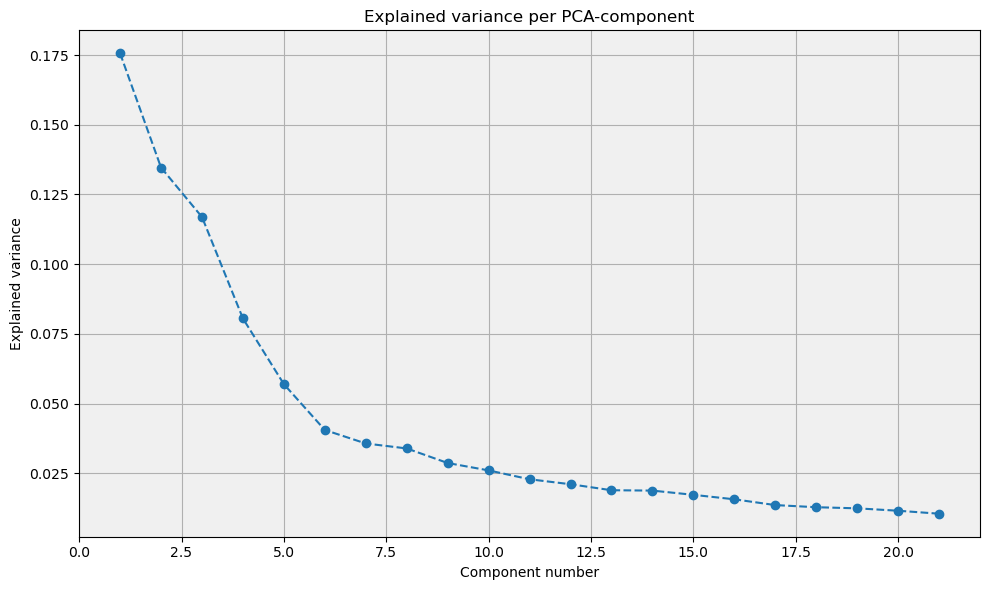

In [73]:
# --- 1. Forklart varians per komponent ---
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_,
         marker='o', linestyle='--')
plt.title('Explained variance per PCA-component')
plt.xlabel('Component number')
plt.ylabel('Explained variance')
plt.grid(True)

# Lys grå bakgrunn
ax = plt.gca()
ax.set_facecolor('#f0f0f0')

plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'first_PCA_explained_variance_per_component.png'), dpi=300, bbox_inches='tight')
plt.show()

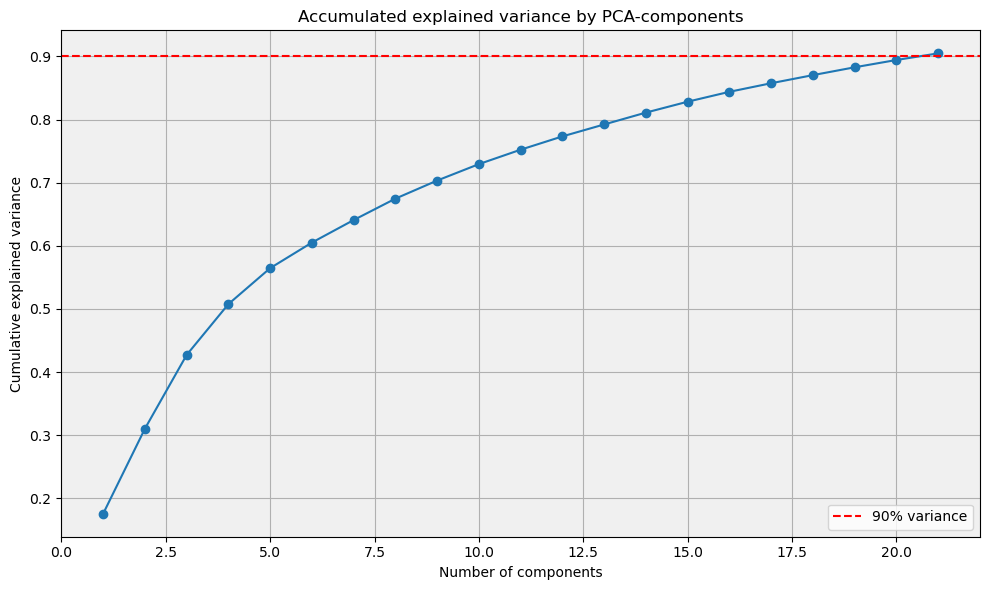

In [75]:
# --- 2. Akkumulert forklart varians ---
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(),
         marker='o')
plt.axhline(0.90, color='r', linestyle='--', label='90% variance')
plt.title('Accumulated explained variance by PCA-components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.legend()
plt.grid(True)

# Lys grå bakgrunn
ax = plt.gca()
ax.set_facecolor('#f0f0f0')

plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'first-PCA-cumulative_explained_variance.png'), dpi=300, bbox_inches='tight')
plt.show()

C:\Users\henri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\henri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\henri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\henri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

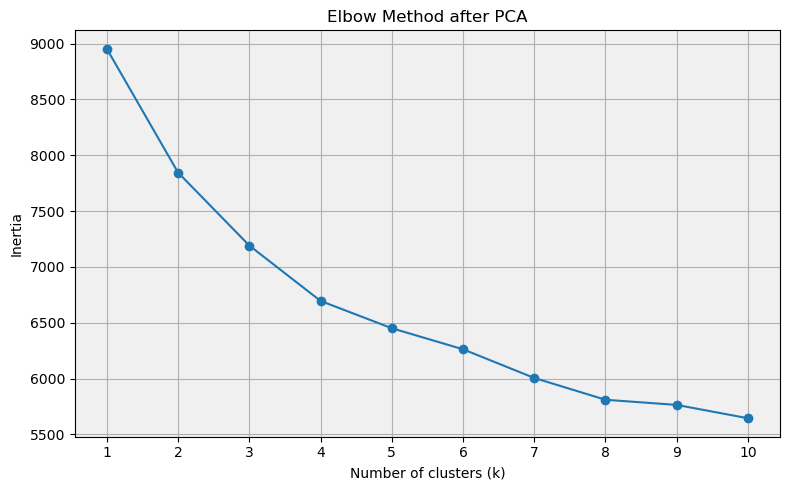

In [81]:
# --- 3. Elbow-metoden ---
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method after PCA')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)

# Lys grå bakgrunn
ax = plt.gca()
ax.set_facecolor('#f0f0f0')

plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'first-clustering-elbow_method_pca.png'), dpi=300, bbox_inches='tight')
plt.show()

In [83]:
inertia

[8953.369490634415,
 7844.825381212651,
 7191.249043511145,
 6695.164151494619,
 6450.641074980218,
 6261.962000175341,
 6005.142658105872,
 5809.756336391956,
 5763.638784503809,
 5644.192239096974]

In [85]:
optimal_k = 4  # decided after looking at elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
df_clean['cluster'] = kmeans.fit_predict(X_pca)

C:\Users\henri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [87]:
df_clean['cluster'].value_counts()

cluster
0    56
1    47
3    46
2    45
Name: count, dtype: int64

In [87]:
df_clean.head()

,age,market value,contract months left,matches played,minutes played,goals,xg,assists,xa,duels per 90,...,"accurate progressive passes, %",poss_decimal,"share forward_passes, %","share lateral_passes, %","share back_passes, %","share progressive_passes, %","share key_passes, %",xg per shot,dribbleratio,cluster
0,26.0,18000000,26,27,2393,8,5.12,6,2.20,20.35,...,73.61,0.473,0.287718,0.303616,0.204489,0.178616,0.012469,0.116959,0.208962,2
1,32.0,2500000,14,26,2255,6,4.66,5,2.39,16.37,...,62.20,0.494,0.248728,0.291349,0.210560,0.108461,0.013041,0.163793,0.035394,0
2,19.0,3500000,2,25,2194,4,1.85,2,3.59,20.88,...,71.69,0.494,0.253819,0.309270,0.244193,0.144172,0.006905,0.049383,0.072811,2
3,31.0,9000000,0,27,2023,8,7.82,5,5.97,12.32,...,77.46,0.473,0.249953,0.301608,0.298959,0.154021,0.012488,0.133574,0.073037,2
4,22.0,3500000,26,25,1972,8,4.40,3,2.64,22.46,...,70.45,0.494,0.208508,0.297269,0.269170,0.111870,0.014181,0.144828,0.123638,0


In [89]:
# Legg til kontekstkolonnene tilbake
final_df = pd.concat([context_data, df_clean[features_filtered], df_clean['cluster']], axis=1)

In [91]:
final_df.head()

,player,squad,league,club today,age,market value,main position,contract months left,minutes played,successful defensive actions per 90,...,"accurate through passes, %",deep completions per 90,deep completed crosses per 90,progressive passes per 90,"share forward_passes, %","share lateral_passes, %","share back_passes, %","share progressive_passes, %",xg per shot,cluster
0,R. Doan,Freiburg,Germany Bundesliga 2024-25,Freiburg,26.0,18000000,RAMF,25,2393,6.73,...,25.00,0.72,0.88,5.73,0.287718,0.303616,0.204489,0.178616,0.116959,2
1,Lee Jae-Sung,Mainz 05,Germany Bundesliga 2024-25,Mainz 05,32.0,2500000,LWF,13,2255,5.96,...,50.00,0.79,0.50,3.41,0.248728,0.291349,0.210560,0.108461,0.163793,0
2,T. Bischof,Hoffenheim,Germany Bundesliga 2024-25,Hoffenheim,19.0,3500000,RAMF,1,2194,10.17,...,46.67,1.12,0.54,6.89,0.253819,0.309270,0.244193,0.144172,0.049383,2
3,V. Grifo,Freiburg,Germany Bundesliga 2024-25,Freiburg,31.0,9000000,LAMF,0,2023,3.96,...,27.59,1.41,0.90,8.14,0.249953,0.301608,0.298959,0.154021,0.133574,2
4,P. Nebel,Mainz 05,Germany Bundesliga 2024-25,Mainz 05,22.0,3500000,RWF,25,1972,7.36,...,25.00,0.73,0.97,4.26,0.208508,0.297269,0.269170,0.111870,0.144828,0


<Axes: >

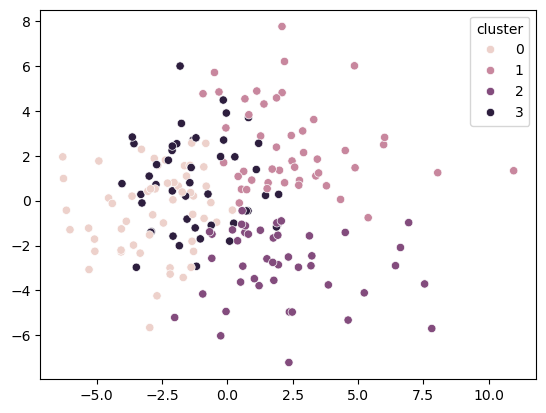

In [93]:
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=final_df['cluster'])

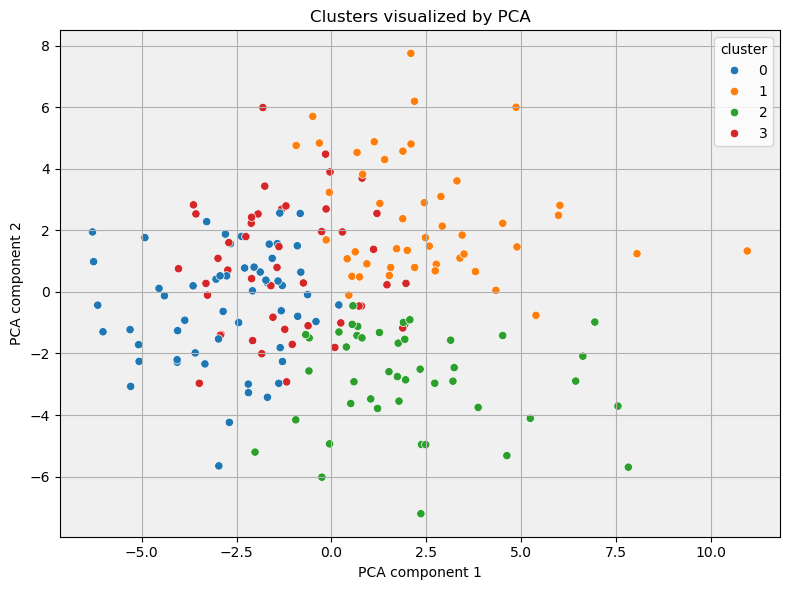

In [97]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_pca[:, 0], 
    y=X_pca[:, 1], 
    hue=final_df['cluster'], 
    palette='tab10'
)
plt.title('Clusters visualized by PCA')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.grid(True)

# Lys grå bakgrunn
ax = plt.gca()
ax.set_facecolor('#f0f0f0')

plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'First-clustersPCA1-PCA2.png'), dpi=400, bbox_inches='tight')
plt.show()


In [ ]:
centers = kmeans.cluster_centers_

In [97]:
import numpy as np

# Hent cluster centers
centers = kmeans.cluster_centers_

# Liste for å lagre indeksene til representantene
representatives = []

# For hver cluster center
for center in centers:
    # Beregn avstand fra center til alle datapunktene
    distances = np.linalg.norm(X_pca - center, axis=1)
    # Finn indeksen til nærmeste datapunkt
    closest_idx = np.argmin(distances)
    representatives.append(closest_idx)

# Nå har du en liste med indekser til representative datapunkter
print(representatives)

[12, 170, 7, 148]


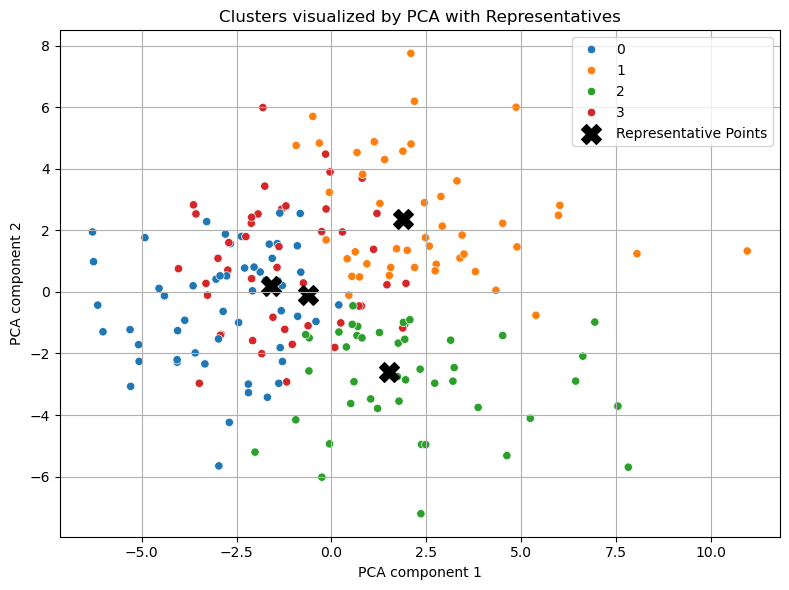

In [99]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=final_df['cluster'], palette='tab10')
plt.scatter(X_pca[representatives, 0], X_pca[representatives, 1], 
            color='black', marker='X', s=200, label='Representative Points')
plt.title('Clusters visualized by PCA with Representatives')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


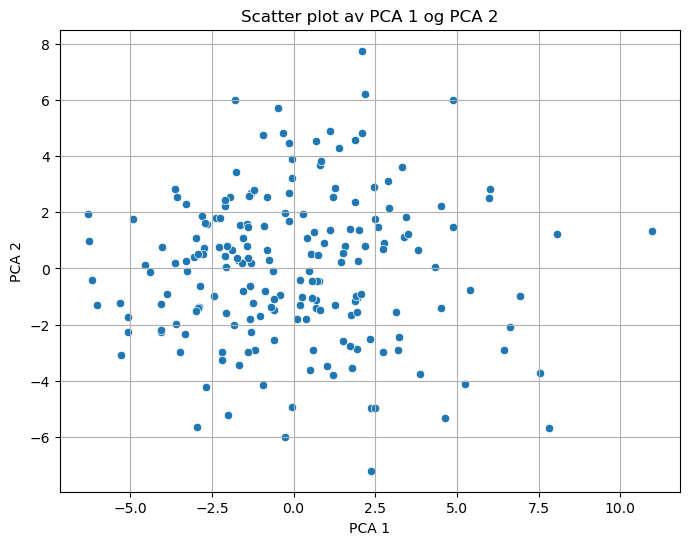

In [99]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Scatter plot av PCA 1 og PCA 2')
plt.grid(True)
plt.show()

C:\Users\henri\AppData\Local\Temp\ipykernel_2420\1020468308.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_features, y=top_features.index, palette=colors)
C:\Users\henri\AppData\Local\Temp\ipykernel_2420\1020468308.py:21: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x=top_features, y=top_features.index, palette=colors)


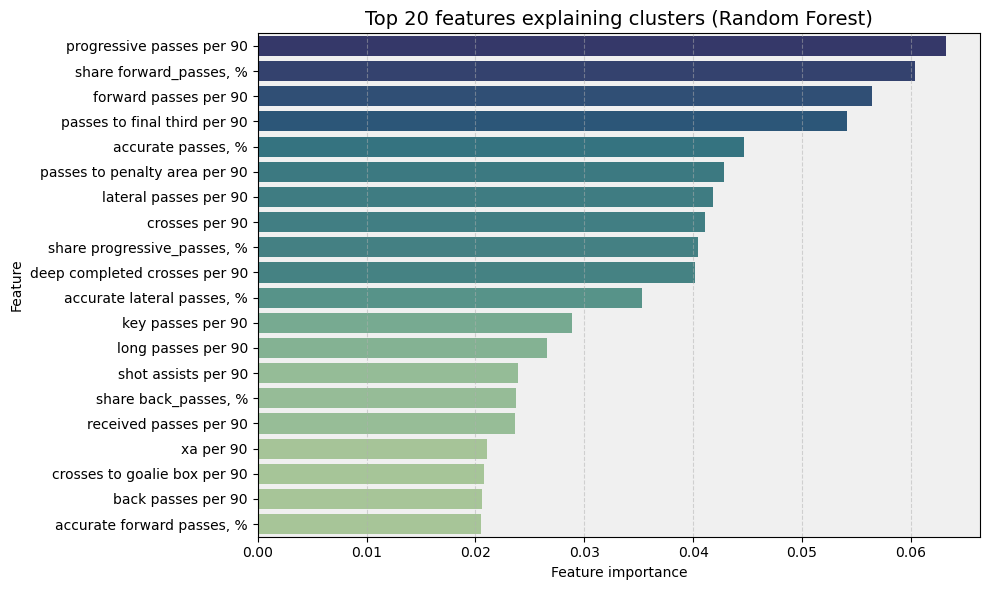

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Bruk originale, skalerte features for å tolke viktigheten
rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, final_df['cluster'])

# Feature importance
importances = pd.Series(rf.feature_importances_, index=features_filtered)
importances_sorted = importances.sort_values(ascending=False)

# Velg topp 20
top_features = importances_sorted.head(20)

# Farge: Skaler verdiene til 0-1 og bruk colormap
norm = (top_features - top_features.min()) / (top_features.max() - top_features.min())
colors = sns.color_palette("crest", as_cmap=True)(norm)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_features, y=top_features.index, palette=colors)

# Lys grå bakgrunn
ax.set_facecolor('#f0f0f0')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)

plt.title('Top 20 features explaining clusters (Random Forest)', fontsize=14)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.tight_layout()

# Lagre figuren
plt.savefig(os.path.join(save_dir, 'first RFC-top20features.png'), dpi=400, bbox_inches='tight')
plt.show()

In [103]:
importances_sorted

progressive passes per 90              0.063186
share forward_passes, %                0.060379
forward passes per 90                  0.056403
passes to final third per 90           0.054158
accurate passes, %                     0.044629
passes to penalty area per 90          0.042853
lateral passes per 90                  0.041837
crosses per 90                         0.041092
share progressive_passes, %            0.040480
deep completed crosses per 90          0.040151
accurate lateral passes, %             0.035288
key passes per 90                      0.028877
long passes per 90                     0.026566
shot assists per 90                    0.023948
share back_passes, %                   0.023752
received passes per 90                 0.023643
xa per 90                              0.021026
crosses to goalie box per 90           0.020776
back passes per 90                     0.020621
accurate forward passes, %             0.020552
progressive runs per 90                0

In [105]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Velg features med importance > 1%, og inkluder manuelt 'xg per shot'
important_features = importances_sorted[importances_sorted > 0.01].index.tolist()
if 'shots per 90' not in important_features:
    important_features.append('shots per 90')

# 2. Behold bare de viktige kolonnene
X_reduced = df_clean[important_features].copy()

# 3. Standardiser alle features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)
X_scaled = pd.DataFrame(X_scaled, columns=important_features, index=X_reduced.index)

# 4. Vekt utvalgte features med faktor 3
features_to_weight = [
    'progressive runs per 90',
    'dribbles per 90',
    'passes to penalty area per 90',
    'accurate passes, %',
    'shots per 90',
    'touches in box per 90',
    'received passes per 90'
]

# Multipliser valgte features med 3
for feature in features_to_weight:
    if feature in X_scaled.columns:
        X_scaled[feature] *= 3

# 5. Kjør PCA for å bevare 90 % av variansen
pca = PCA(n_components=0.90)
X_pca_weighted = pca.fit_transform(X_scaled)

In [107]:
print(f"Number of PCA-komponenter kept: {X_pca_weighted.shape[1]}")

Number of PCA-komponenter kept: 9


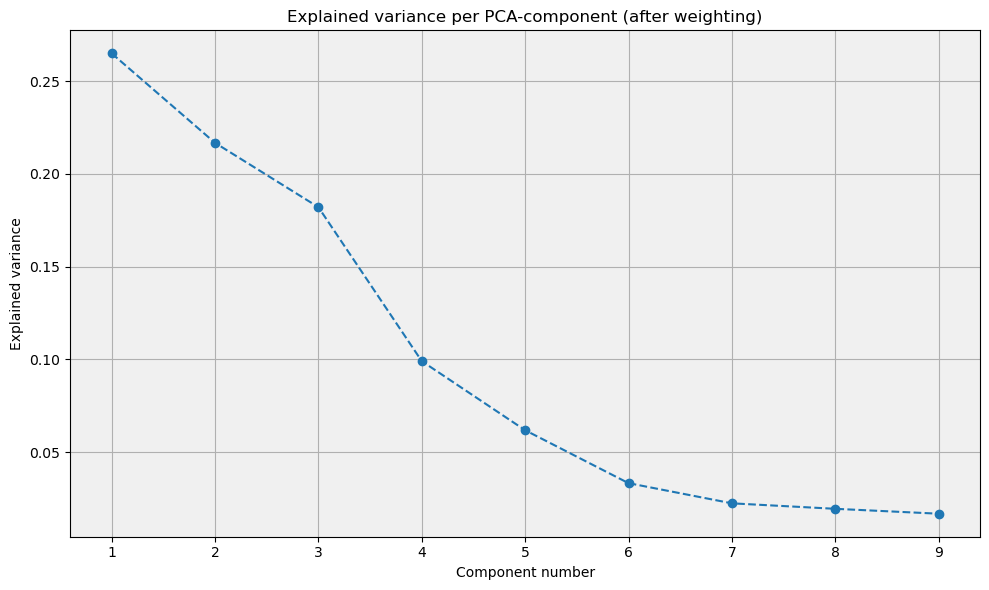

In [109]:
# --- 1. Forklart varians per komponent ---
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_,
         marker='o', linestyle='--')
plt.title('Explained variance per PCA-component (after weighting)')
plt.xlabel('Component number')
plt.ylabel('Explained variance')
plt.grid(True)

ax = plt.gca()
ax.set_facecolor('#f0f0f0')

plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'PCA2_explained_variance_per_component.png'), dpi=300, bbox_inches='tight')
plt.show()

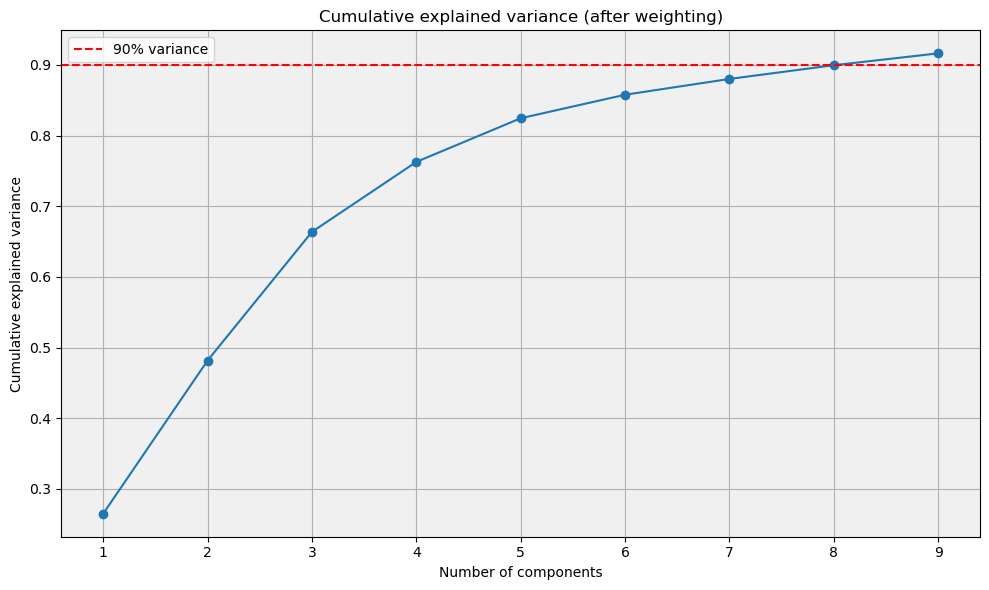

In [111]:
# --- 2. Akkumulert forklart varians ---
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(),
         marker='o')
plt.axhline(0.90, color='r', linestyle='--', label='90% variance')
plt.title('Cumulative explained variance (after weighting)')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.legend()
plt.grid(True)

ax = plt.gca()
ax.set_facecolor('#f0f0f0')

plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'PCA2_cumulative_explained_variance.png'), dpi=300, bbox_inches='tight')
plt.show()


In [113]:
print(f"Totalt forklart varians: {round(sum(pca.explained_variance_ratio_) * 100, 2)} %")

Totalt forklart varians: 91.62 %


C:\Users\henri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\henri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\henri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\henri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

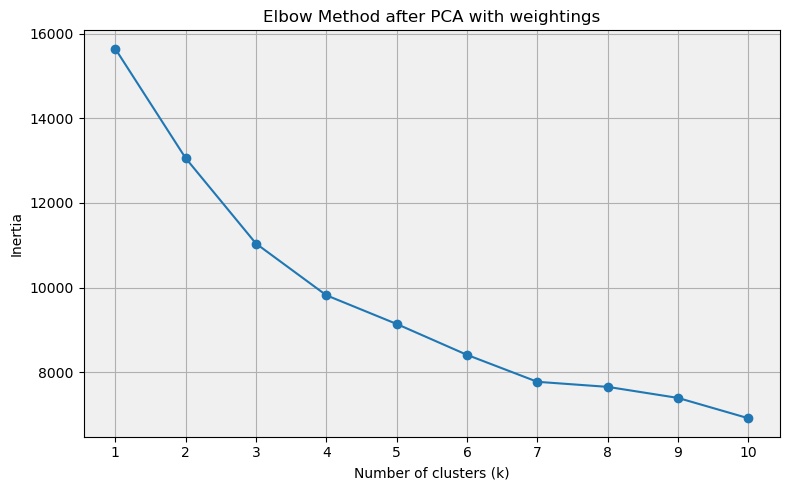

In [115]:
# --- 3. Elbow-metoden (ny K-means etter vekting og ny PCA) ---
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_pca_weighted)  # ⚠️ Her er forskjellen!
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method after PCA with weightings')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)

ax = plt.gca()
ax.set_facecolor('#f0f0f0')

plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'PCA2_clustering_elbow_method.png'), dpi=300, bbox_inches='tight')
plt.show()

In [117]:
inertia

[15641.84606933039,
 13058.250371294376,
 11040.168740372017,
 9818.103943158238,
 9139.564756404447,
 8409.564349704213,
 7772.9314075344755,
 7652.945289826941,
 7391.710547029962,
 6911.483383106653]

In [119]:
from sklearn.cluster import KMeans

# 1. Fjern gammel 'cluster'-kolonne i df_clean hvis den finnes
df_clean.drop(columns='cluster', inplace=True, errors='ignore')

# 2. Kjør KMeans på X_pca_weighted med k=4 (fra elbow-metoden)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X_pca_weighted)

C:\Users\henri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [121]:

# 3. Legg til nye cluster-labels i df_clean
df_clean['cluster'] = clusters

# 4. Fjern eventuell gammel 'cluster'-kolonne i final_df
final_df = final_df.drop(columns='cluster', errors='ignore')

# 5. Lag ny final_df med kontekst, valgte features og nye cluster-IDer
final_df = pd.concat([context_data, df_clean[important_features], df_clean['cluster']], axis=1)

In [123]:
final_df.head()

,player,squad,league,club today,age,market value,main position,contract months left,minutes played,progressive passes per 90,...,successful defensive actions per 90,"average pass length, m","average long pass length, m",deep completions per 90,"accurate back passes, %","accurate passes to penalty area, %",assists per 90,"share lateral_passes, %",shots per 90,cluster
0,R. Doan,Freiburg,Germany Bundesliga 2024-25,Freiburg,26.0,18000000,RAMF,25,2393,5.73,...,6.73,17.30,31.30,0.72,96.97,42.19,0.24,0.303616,1.71,1
1,Lee Jae-Sung,Mainz 05,Germany Bundesliga 2024-25,Mainz 05,32.0,2500000,LWF,13,2255,3.41,...,5.96,15.01,20.45,0.79,93.08,55.00,0.21,0.291349,1.16,2
2,T. Bischof,Hoffenheim,Germany Bundesliga 2024-25,Hoffenheim,19.0,3500000,RAMF,1,2194,6.89,...,10.17,17.59,39.95,1.12,96.09,60.94,0.08,0.309270,1.62,3
3,V. Grifo,Freiburg,Germany Bundesliga 2024-25,Freiburg,31.0,9000000,LAMF,0,2023,8.14,...,3.96,18.82,32.36,1.41,95.24,51.76,0.23,0.301608,2.77,3
4,P. Nebel,Mainz 05,Germany Bundesliga 2024-25,Mainz 05,22.0,3500000,RWF,25,1972,4.26,...,7.36,17.54,25.17,0.73,91.51,50.00,0.14,0.297269,1.45,1


In [125]:
final_df.shape

(194, 42)

C:\Users\henri\AppData\Local\Temp\ipykernel_2420\2146915984.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_features, y=top_features.index, palette=colors)
C:\Users\henri\AppData\Local\Temp\ipykernel_2420\2146915984.py:23: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x=top_features, y=top_features.index, palette=colors)


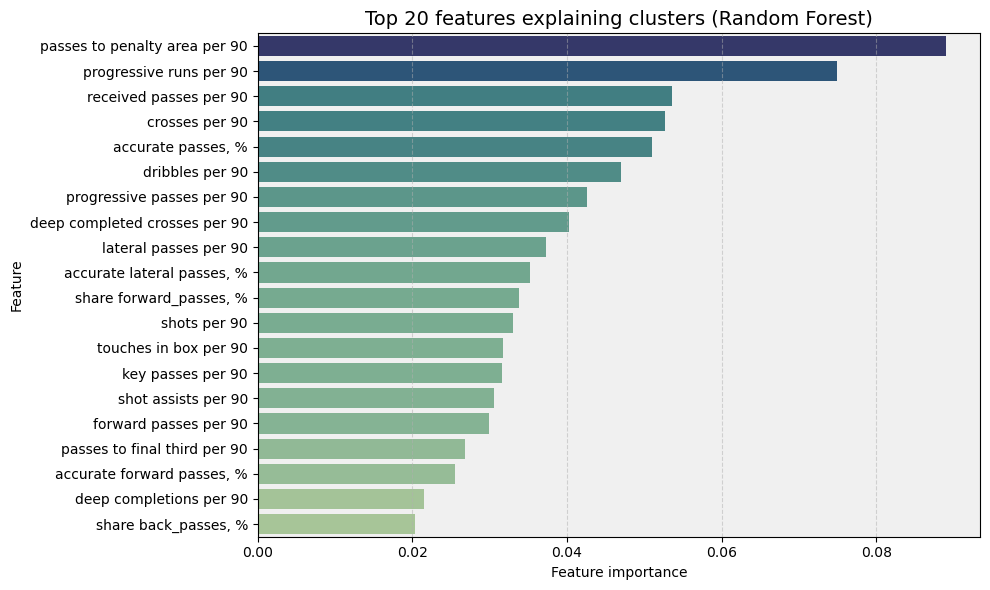

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# 1. Tren Random Forest på skalert og vektet data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, final_df['cluster'])

# 2. Beregn feature importances
importances = pd.Series(rf.feature_importances_, index=X_scaled.columns)
importances_sorted = importances.sort_values(ascending=False)

# 3. Velg topp 20 features
top_features = importances_sorted.head(20)

# 4. Skaler verdier for fargebruk
norm = (top_features - top_features.min()) / (top_features.max() - top_features.min())
colors = sns.color_palette("crest", as_cmap=True)(norm)

# 5. Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_features, y=top_features.index, palette=colors)

# Lys grå bakgrunn
ax.set_facecolor('#f0f0f0')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)

plt.title('Top 20 features explaining clusters (Random Forest)', fontsize=14)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.tight_layout()

# (Valgfritt) lagre bildet
plt.savefig(os.path.join(save_dir, 'RFC_2-featureimportance.png'), dpi=300, bbox_inches='tight')
plt.show()


In [129]:
col_list = final_df.columns.to_list()
print(col_list) #print columns

['player', 'squad', 'league', 'club today', 'age', 'market value', 'main position', 'contract months left', 'minutes played', 'progressive passes per 90', 'share forward_passes, %', 'forward passes per 90', 'passes to final third per 90', 'accurate passes, %', 'passes to penalty area per 90', 'lateral passes per 90', 'crosses per 90', 'share progressive_passes, %', 'deep completed crosses per 90', 'accurate lateral passes, %', 'key passes per 90', 'long passes per 90', 'shot assists per 90', 'share back_passes, %', 'received passes per 90', 'xa per 90', 'crosses to goalie box per 90', 'back passes per 90', 'accurate forward passes, %', 'progressive runs per 90', 'touches in box per 90', 'dribbles per 90', 'successful defensive actions per 90', 'average pass length, m', 'average long pass length, m', 'deep completions per 90', 'accurate back passes, %', 'accurate passes to penalty area, %', 'assists per 90', 'share lateral_passes, %', 'shots per 90', 'cluster']


In [131]:
importances_sorted

passes to penalty area per 90          0.088984
progressive runs per 90                0.074914
received passes per 90                 0.053654
crosses per 90                         0.052722
accurate passes, %                     0.051018
dribbles per 90                        0.046987
progressive passes per 90              0.042538
deep completed crosses per 90          0.040305
lateral passes per 90                  0.037356
accurate lateral passes, %             0.035241
share forward_passes, %                0.033774
shots per 90                           0.033043
touches in box per 90                  0.031761
key passes per 90                      0.031646
shot assists per 90                    0.030633
forward passes per 90                  0.029987
passes to final third per 90           0.026806
accurate forward passes, %             0.025517
deep completions per 90                0.021542
share back_passes, %                   0.020347
long passes per 90                     0

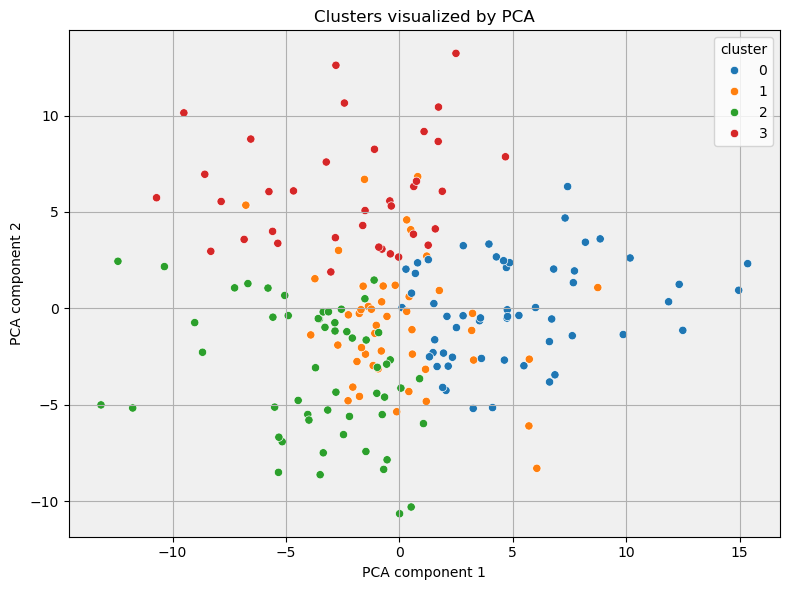

In [133]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_pca_weighted[:, 0], 
    y=X_pca_weighted[:, 1], 
    hue=final_df['cluster'], 
    palette='tab10'
)
plt.title('Clusters visualized by PCA')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.grid(True)

# Lys grå bakgrunn
ax = plt.gca()
ax.set_facecolor('#f0f0f0')

plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'Final-clustersPCA1-PCA2.png'), dpi=400, bbox_inches='tight')
plt.show()

In [207]:
import numpy as np
import pandas as pd

# Samle PCA-koordinatene i en DataFrame for lettere håndtering
pca_df = pd.DataFrame(
    X_pca_weighted[:, :2],  # kun de to første PCA-komponentene
    columns=['PCA1', 'PCA2'],
    index=final_df.index
)
pca_df['cluster'] = final_df['cluster']
pca_df['player'] = final_df['player']

# Lager en dictionary for å lagre nærmeste spiller i hver cluster
closest_players = {}

# Loop gjennom hver cluster
for cluster_label in pca_df['cluster'].unique():
    # Filtrer datapunktene for den aktuelle cluster
    cluster_points = pca_df[pca_df['cluster'] == cluster_label]
    
    # Finn sentrum (gjennomsnittet) av clusteret
    center = cluster_points[['PCA1', 'PCA2']].mean().values
    
    # Beregn euklidisk avstand til sentrum
    distances = np.linalg.norm(cluster_points[['PCA1', 'PCA2']].values - center, axis=1)
    
    # Finn indeksen til den spilleren som er nærmest
    closest_idx = distances.argmin()
    
    # Hent spillerens navn
    closest_player = cluster_points.iloc[closest_idx]['player']
    
    # Lagre resultatet
    closest_players[cluster_label] = closest_player

# Print resultatene
for cluster, player in closest_players.items():
    print(f"Cluster {cluster}: {player}")

Cluster 1: Robert Navarro
Cluster 2: J. Ayew
Cluster 3: Samuel Lino
Cluster 0: T. Kubo


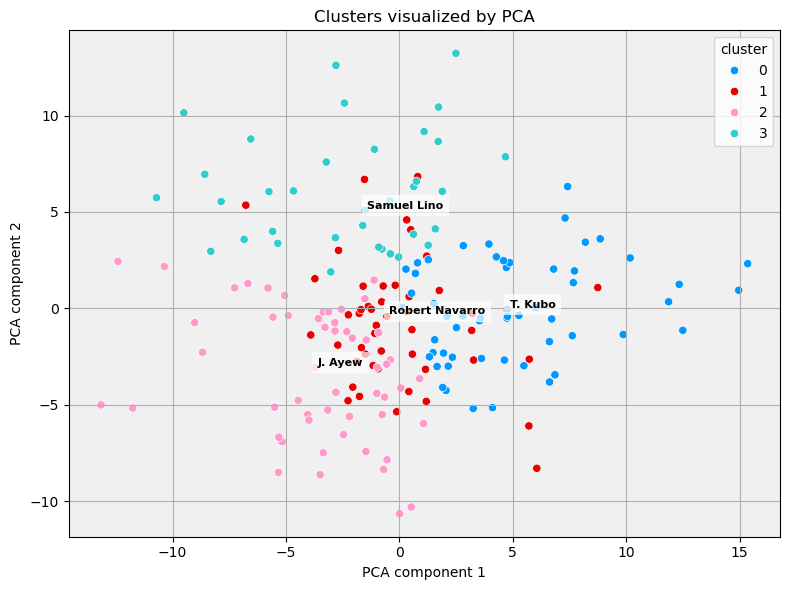

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Fargekart basert på ønskene dine
custom_palette = {
    0: '#0099FF',   # Cluster 0 (blå)
    1: '#E60000',   # Cluster 1 (rød)
    2: '#ff99cc',   # Cluster 2 (rosa)
    3: '#33CCCC',   # Cluster 3 (turkis)
}
# Spillere du vil legge til navn for (oppdatert liste)
label_players = ['Robert Navarro', 'J. Ayew', 'Samuel Lino', 'T. Kubo']

# Lag scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_pca_weighted[:, 0], 
    y=X_pca_weighted[:, 1], 
    hue=final_df['cluster'], 
    palette=custom_palette
)

plt.title('Clusters visualized by PCA')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.grid(True)

# Lys grå bakgrunn
ax = plt.gca()
ax.set_facecolor('#f0f0f0')

# --- Legg til labels for utvalgte spillere ---
for player_name in label_players:
    # Finn raden i final_df som matcher spilleren
    player_row = final_df[final_df['player'] == player_name]
    
    # Hent X og Y koordinatene fra PCA
    x = X_pca_weighted[player_row.index[0], 0]
    y = X_pca_weighted[player_row.index[0], 1]
    
    # Legg til teksten litt forskjøvet så den ikke dekker punktet
    plt.text(x + 0.1, y + 0.1, player_name, fontsize=8, weight='bold', color='black',
         bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))


plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'Final-clustersPCA1-PCA2-labeled_new.png'), dpi=400, bbox_inches='tight')
plt.show()


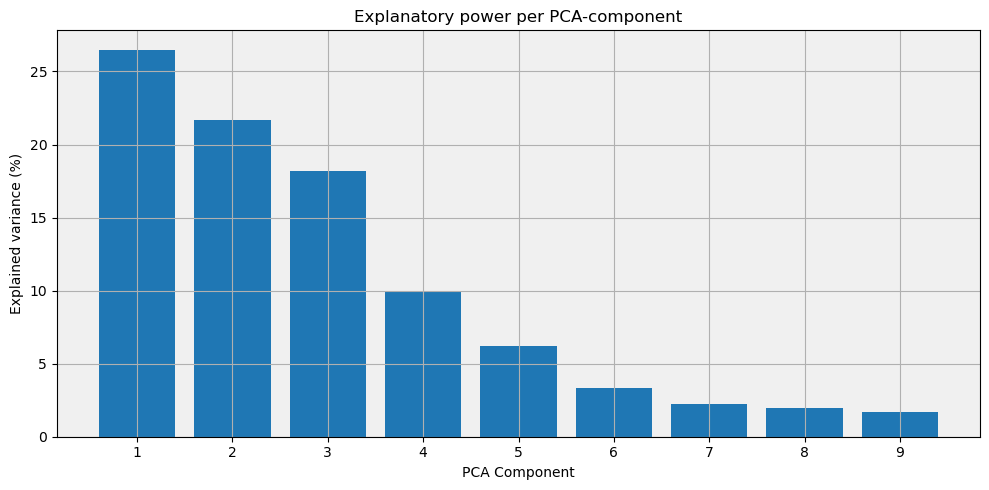

In [139]:
explained_var = pca.explained_variance_ratio_

plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_var) + 1), explained_var * 100)
plt.xlabel('PCA Component')
plt.ylabel('Explained variance (%)')
plt.title('Explanatory power per PCA-component')
plt.xticks(range(1, len(explained_var) + 1))
plt.grid(True)

# Lys grå bakgrunn
ax = plt.gca()
ax.set_facecolor('#f0f0f0')

plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'VAriance-PCA2-Explained variance-per-component.png'), dpi=400, bbox_inches='tight')
plt.show()


In [397]:
explained_var

array([0.26492251, 0.21667996, 0.18201921, 0.09901532, 0.06177605,
       0.03324727, 0.02237156, 0.0194186 , 0.01677763])

In [143]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PCA{i+1}' for i in range(pca.n_components_)],
    index=X_scaled.columns  # Bruk riktige kolonnenavn her!
)


In [145]:
loadings

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
progressive passes per 90,-0.023460,0.164664,0.132824,-0.056364,0.038271,-0.110941,-0.022859,-0.061465,0.093831
"share forward_passes, %",-0.077908,0.040407,0.092381,-0.064990,0.114282,-0.334804,-0.198873,-0.080266,0.084924
forward passes per 90,-0.082310,0.156122,0.062976,-0.052535,0.056696,-0.251249,-0.008373,-0.043699,0.059721
passes to final third per 90,-0.086211,0.150054,0.052565,-0.074860,0.113933,-0.169839,0.016157,0.010197,0.127671
"accurate passes, %",-0.139549,0.345738,-0.574388,0.232310,0.052592,0.298081,-0.252518,-0.007959,0.137470
passes to penalty area per 90,0.238341,0.425889,0.453655,-0.051835,-0.146389,0.295971,-0.281259,-0.367880,-0.183878
lateral passes per 90,-0.015764,0.191668,0.048890,-0.036092,0.023571,0.063547,0.130231,0.092288,0.173292
crosses per 90,0.092366,0.014165,0.173296,0.035147,-0.100850,0.167850,0.126729,0.041781,-0.056911
"share progressive_passes, %",0.015817,0.056862,0.182774,-0.061064,0.067964,-0.098259,-0.176783,-0.090590,0.141771
deep completed crosses per 90,0.077815,0.047012,0.165365,0.030355,-0.056252,0.213129,0.024427,0.053548,-0.017520


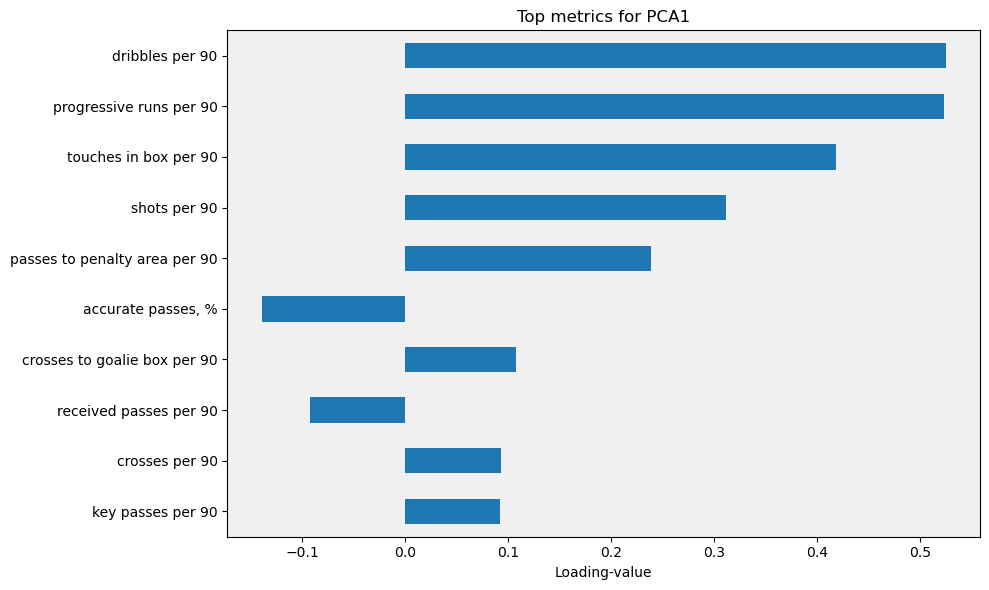

In [147]:
top_pca1 = loadings['PCA1'].sort_values(key=abs, ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_pca1.plot(kind='barh', title='Top metrics for PCA1')
plt.gca().invert_yaxis()
plt.xlabel("Loading-value")

# Lys grå bakgrunn
ax = plt.gca()
ax.set_facecolor('#f0f0f0')

plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'Part2-Loadings-values-PCA1.png'), dpi=400, bbox_inches='tight')
plt.show()

In [149]:
top_pca1

dribbles per 90                  0.524592
progressive runs per 90          0.522580
touches in box per 90            0.418383
shots per 90                     0.311230
passes to penalty area per 90    0.238341
accurate passes, %              -0.139549
crosses to goalie box per 90     0.107012
received passes per 90          -0.092684
crosses per 90                   0.092366
key passes per 90                0.092197
Name: PCA1, dtype: float64

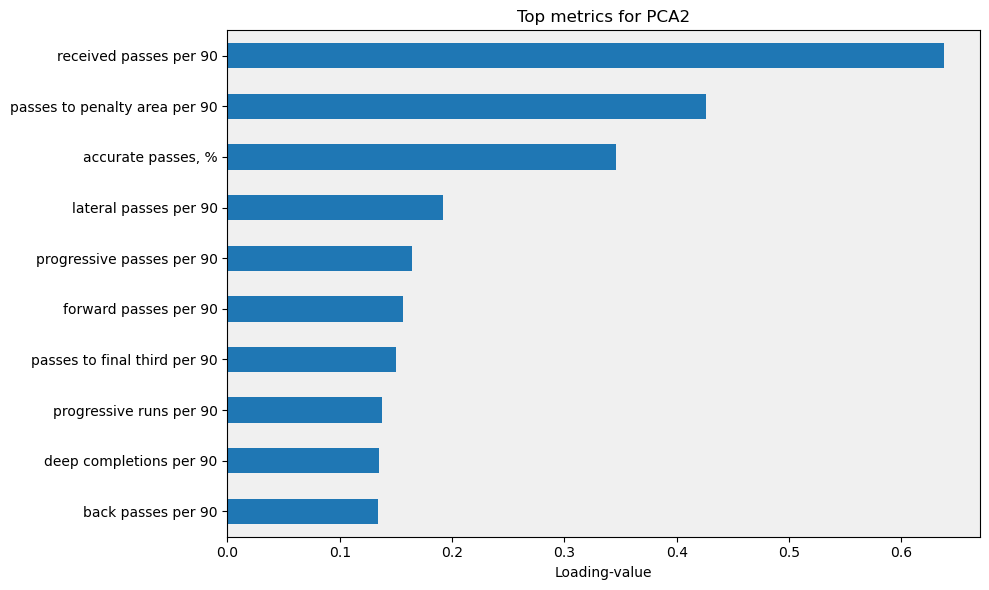

In [151]:
top_pca2 = loadings['PCA2'].sort_values(key=abs, ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_pca2.plot(kind='barh', title='Top metrics for PCA2')
plt.gca().invert_yaxis()
plt.xlabel("Loading-value")

# Lys grå bakgrunn
ax = plt.gca()
ax.set_facecolor('#f0f0f0')

plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'Part2-Loadings-values-PCA2.png'), dpi=400, bbox_inches='tight')
plt.show()


In [153]:
top_pca2

received passes per 90           0.638026
passes to penalty area per 90    0.425889
accurate passes, %               0.345738
lateral passes per 90            0.191668
progressive passes per 90        0.164664
forward passes per 90            0.156122
passes to final third per 90     0.150054
progressive runs per 90          0.137180
deep completions per 90          0.135225
back passes per 90               0.134336
Name: PCA2, dtype: float64

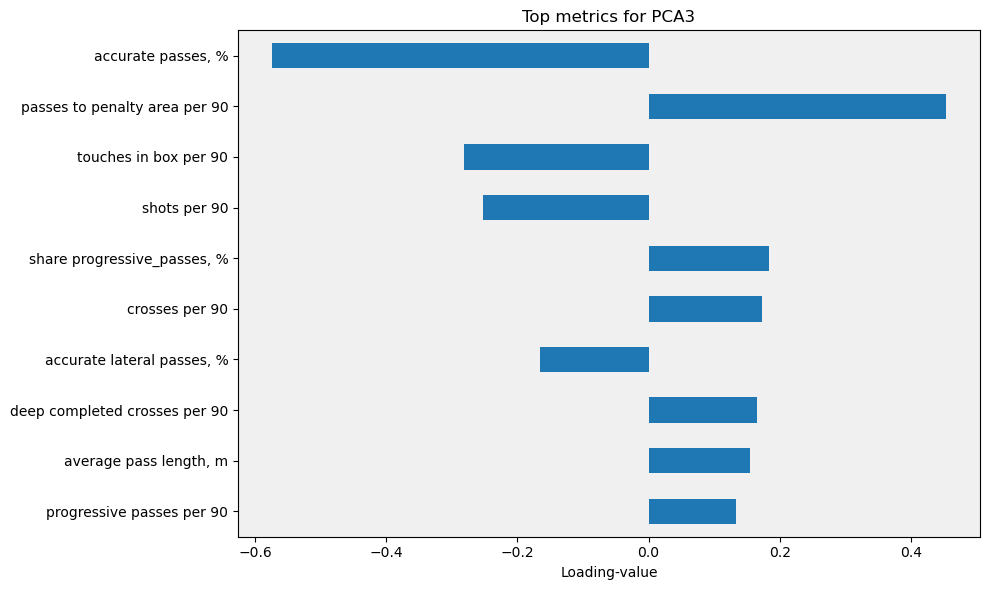

In [399]:
top_pca3 = loadings['PCA3'].sort_values(key=abs, ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_pca3.plot(kind='barh', title='Top metrics for PCA3')
plt.gca().invert_yaxis()
plt.xlabel("Loading-value")

# Lys grå bakgrunn
ax = plt.gca()
ax.set_facecolor('#f0f0f0')

plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'Part2-Loadings-values-PCA3.png'), dpi=400, bbox_inches='tight')
plt.show()


In [161]:
final_df.head()

,player,squad,league,club today,age,market value,main position,contract months left,minutes played,progressive passes per 90,...,successful defensive actions per 90,"average pass length, m","average long pass length, m",deep completions per 90,"accurate back passes, %","accurate passes to penalty area, %",assists per 90,"share lateral_passes, %",shots per 90,cluster
0,R. Doan,Freiburg,Germany Bundesliga 2024-25,Freiburg,26.0,18000000,RAMF,25,2393,0.515330,...,6.73,17.30,31.30,0.72,96.97,42.19,0.24,0.303616,0.349432,1
1,Lee Jae-Sung,Mainz 05,Germany Bundesliga 2024-25,Mainz 05,32.0,2500000,LWF,13,2255,0.241745,...,5.96,15.01,20.45,0.79,93.08,55.00,0.21,0.291349,0.193182,2
2,T. Bischof,Hoffenheim,Germany Bundesliga 2024-25,Hoffenheim,19.0,3500000,RAMF,1,2194,0.652123,...,10.17,17.59,39.95,1.12,96.09,60.94,0.08,0.309270,0.323864,3
3,V. Grifo,Freiburg,Germany Bundesliga 2024-25,Freiburg,31.0,9000000,LAMF,0,2023,0.799528,...,3.96,18.82,32.36,1.41,95.24,51.76,0.23,0.301608,0.650568,3
4,P. Nebel,Mainz 05,Germany Bundesliga 2024-25,Mainz 05,22.0,3500000,RWF,25,1972,0.341981,...,7.36,17.54,25.17,0.73,91.51,50.00,0.14,0.297269,0.275568,1


C:\Users\henri\AppData\Local\Temp\ipykernel_2420\500848214.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', num_clusters)


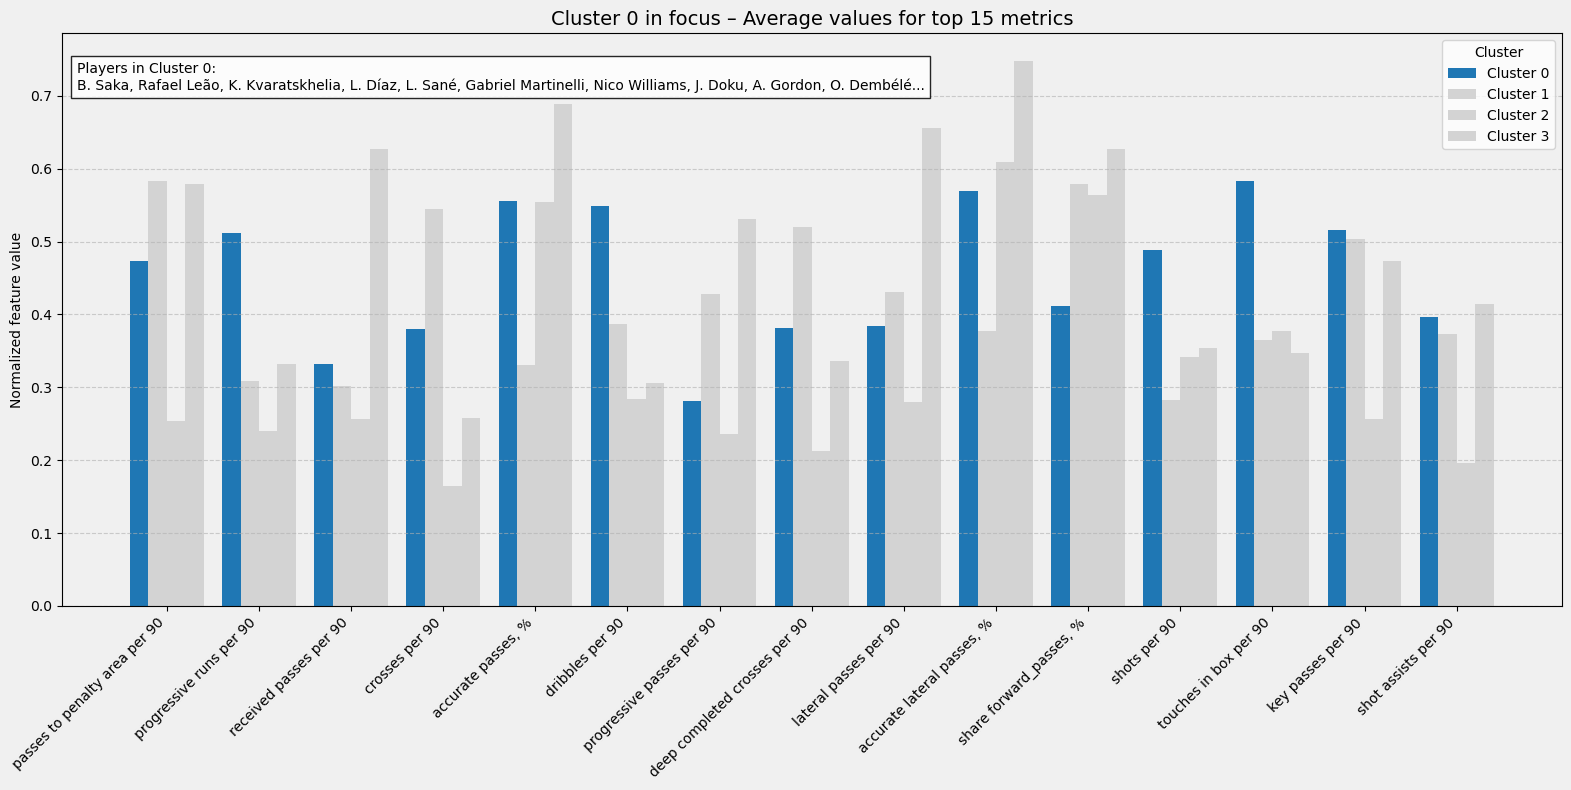

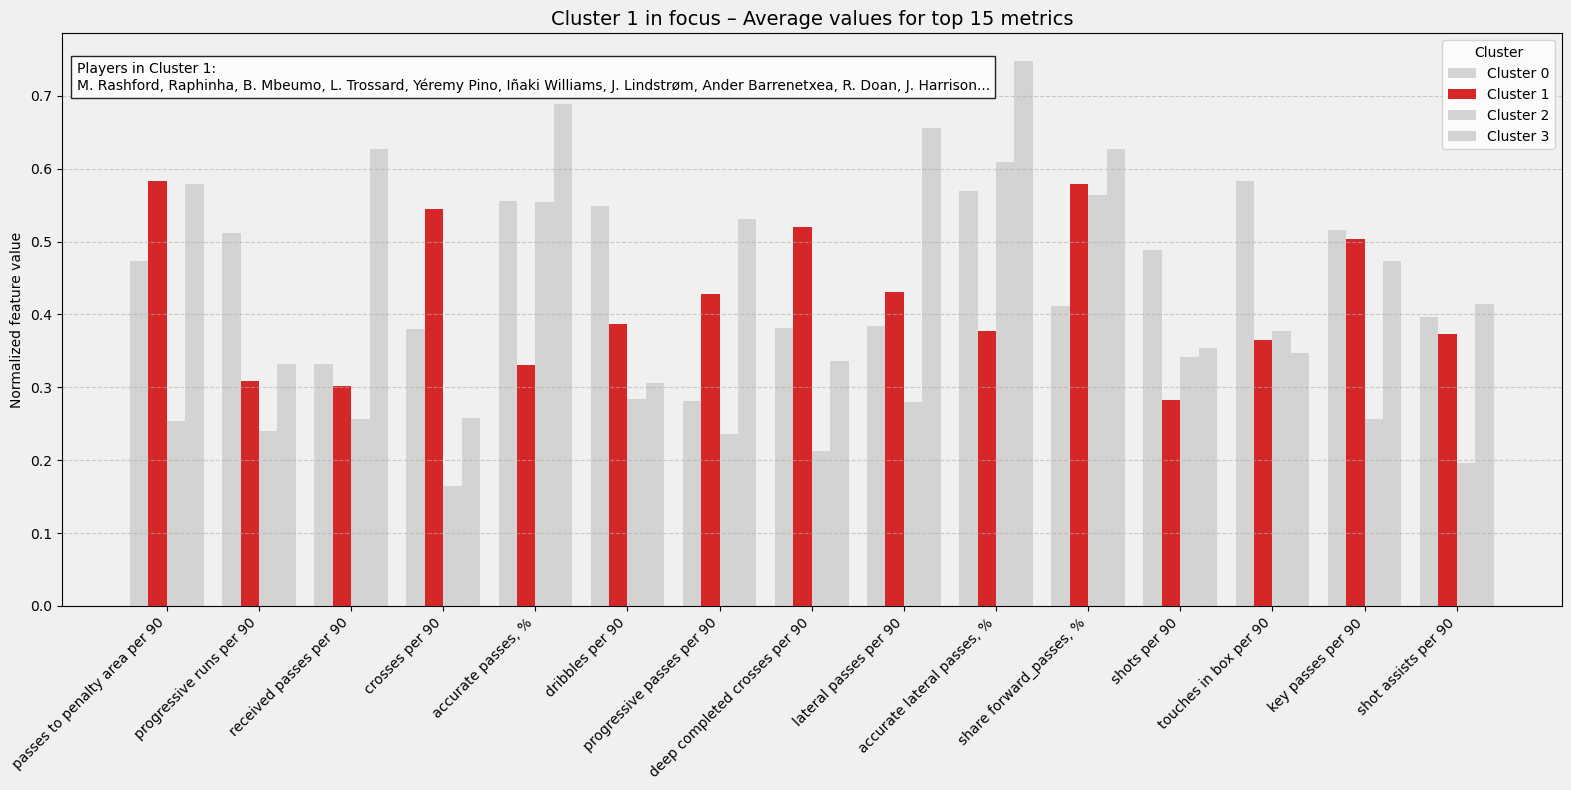

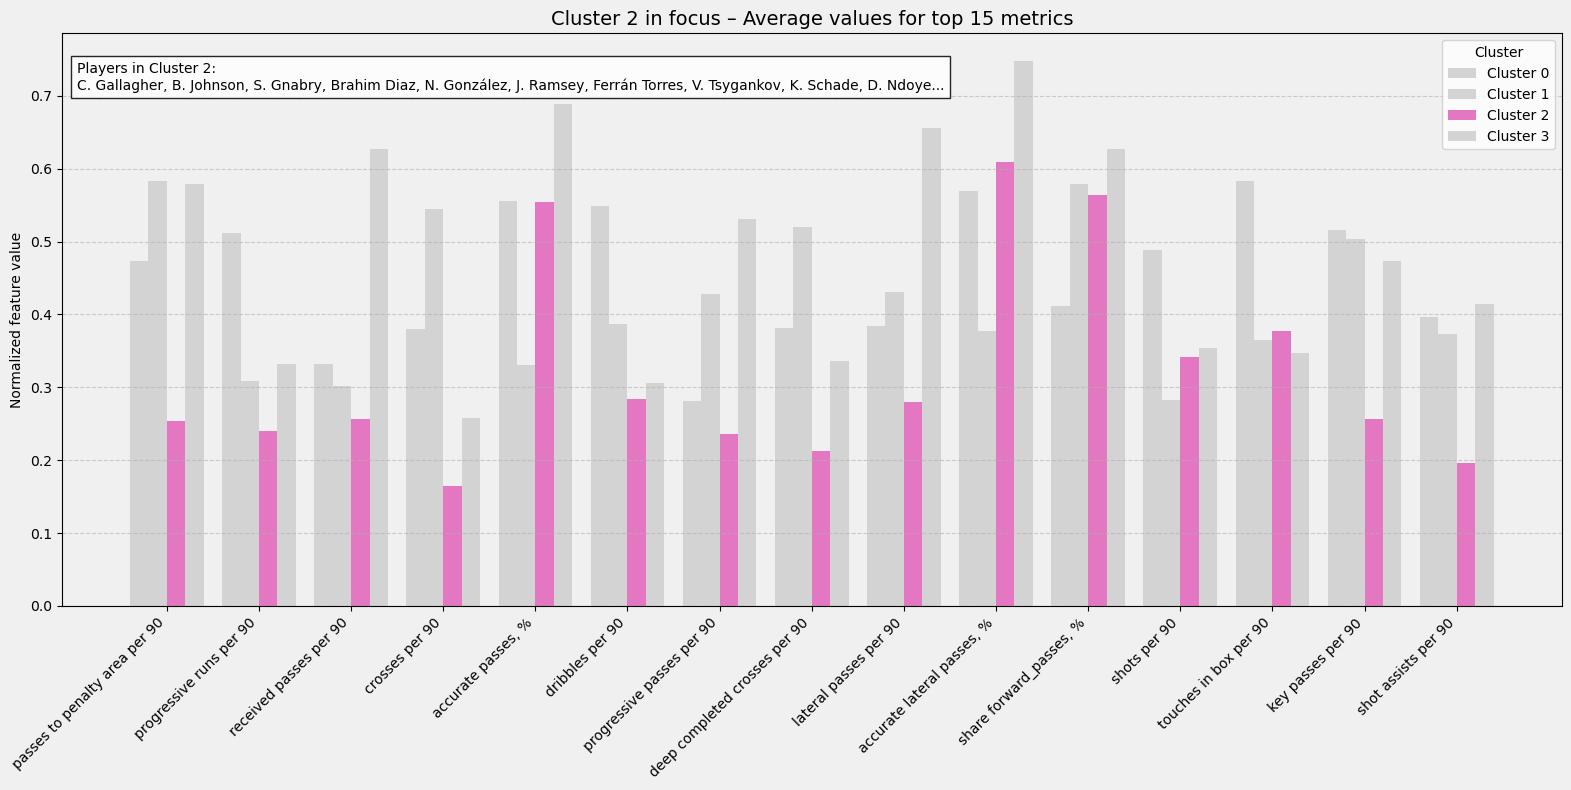

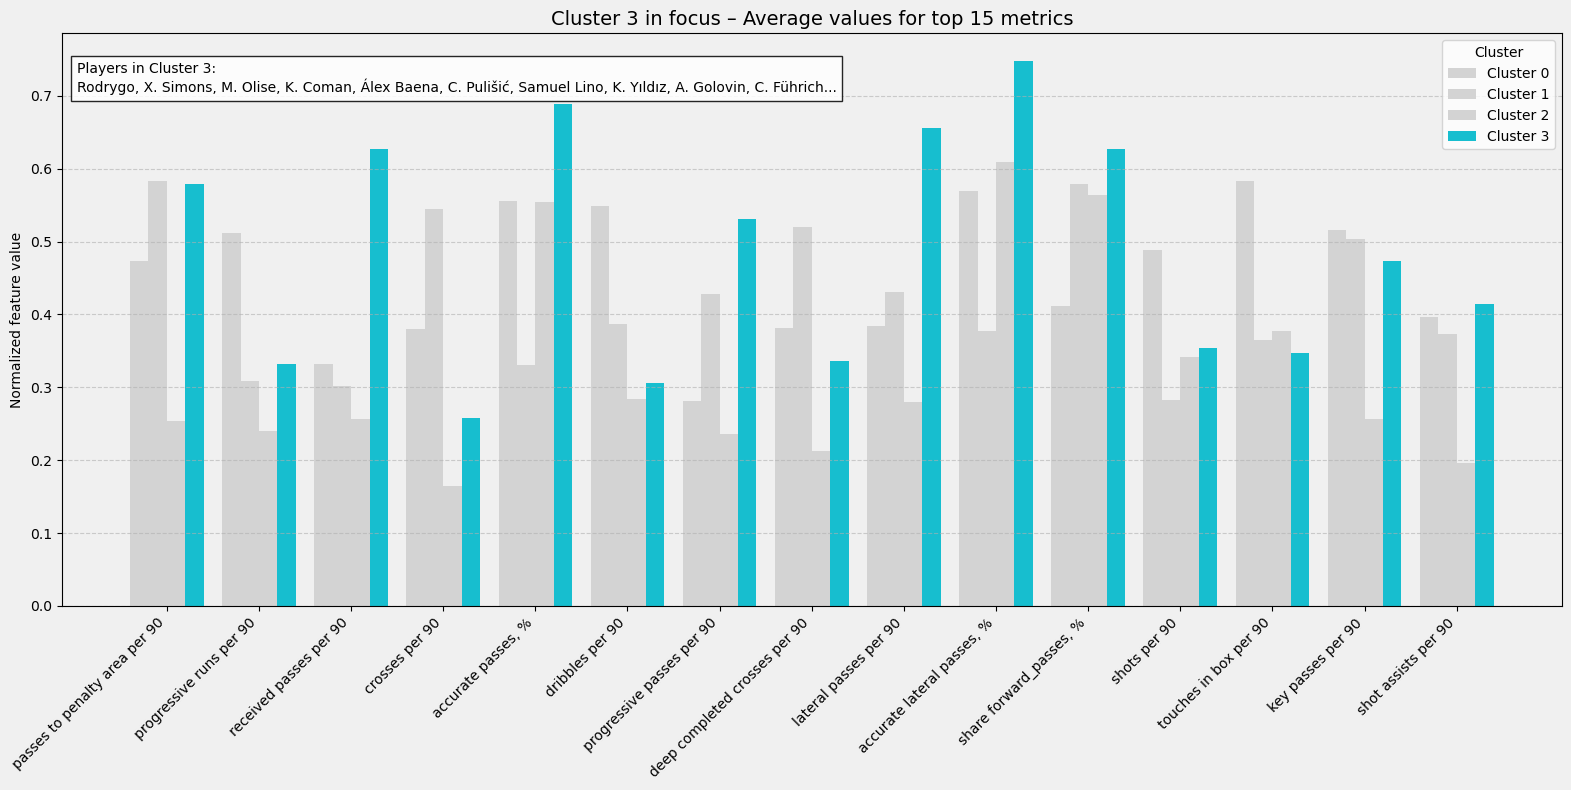

In [163]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import os

# 1. Top 15 features
top_features = importances_sorted.head(15).index.tolist()

# 2. Normalize disse kolonnene
scaler = MinMaxScaler()
final_df[top_features] = scaler.fit_transform(final_df[top_features])

# 3. Beregn cluster-gjennomsnitt
cluster_means = final_df.groupby('cluster')[top_features].mean()

# 4. Fargeoppsett
cluster_ids = sorted(final_df['cluster'].unique())
num_clusters = len(cluster_ids)

cmap = plt.cm.get_cmap('tab10', num_clusters)
cluster_colors = {cluster_id: cmap(i) for i, cluster_id in enumerate(cluster_ids)}
background_color = '#f0f0f0'
neutral_bar_color = '#d3d3d3'

# 5. Plot for hvert cluster
for focus_cluster in cluster_ids:
    fig, ax = plt.subplots(figsize=(16, 8))
    fig.patch.set_facecolor(background_color)
    ax.set_facecolor(background_color)

    x = np.arange(len(top_features))
    width = 0.2

    for i, cluster_id in enumerate(cluster_ids):
        offset = (i - num_clusters / 2) * width + width / 2
        color = cluster_colors[cluster_id] if cluster_id == focus_cluster else neutral_bar_color

        ax.bar(x + offset, cluster_means.loc[cluster_id], width, 
               label=f'Cluster {cluster_id}', color=color)

    ax.set_xticks(x)
    ax.set_xticklabels(top_features, rotation=45, ha='right')
    ax.set_ylabel('Normalized feature value')
    ax.set_title(f'Cluster {focus_cluster} in focus – Average values for top 15 metrics', fontsize=14)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.legend(title='Cluster', loc='upper right')

    # 6. Spillerliste
    players_in_cluster = final_df[final_df['cluster'] == focus_cluster] \
        .sort_values('market value', ascending=False)['player'].tolist()
    
    player_text = ', '.join(players_in_cluster[:10]) + ('...' if len(players_in_cluster) > 10 else '')

    ax.text(0.01, 0.95, f"Players in Cluster {focus_cluster}:\n{player_text}", 
            transform=ax.transAxes, fontsize=10, va='top', ha='left', 
            bbox=dict(facecolor='white', alpha=0.85))

    plt.tight_layout()

    # 7. Lagre figur
    filename = f'Cluster{focus_cluster}_Top15_Features.png'
    filepath = os.path.join(save_dir, filename)
    #plt.savefig(filepath, dpi=400, bbox_inches='tight')
    plt.show()

In [173]:
import pandas as pd

# Lag en dictionary for å samle spillerlistene for hver cluster
cluster_dict = {}

# For hver cluster: sortér spillerne etter market value (høyest først)
for cluster_id in sorted(final_df['cluster'].unique()):
    players_in_cluster = (
        final_df[final_df['cluster'] == cluster_id]
        .sort_values('market value', ascending=False)
        [['player', 'market value']]
    )
    
    # Formater som "Navn (€Verdi)" for visning
    player_list = [f"{row['player']} (€{row['market value']:,})" for _, row in players_in_cluster.iterrows()]
    
    # Lagre i dict med cluster-navn som nøkkel
    cluster_dict[f"Cluster {cluster_id}"] = player_list

# Lag DataFrame der nøklene blir rader — deretter transponer for å få kolonner
cluster_table = pd.DataFrame.from_dict(cluster_dict, orient='index').transpose()
# Bytt navn på kolonnene til rollene
cluster_table.columns = ['Runner', 'Creator', 'Ball Retainer', 'Playmaker']
# Erstatt NaN med tom streng
cluster_table = cluster_table.fillna('')
# Vis tabellen
cluster_table


,Runner,Creator,Ball Retainer,Playmaker
0,"B. Saka (€140,000,000)","M. Rashford (€60,000,000)","C. Gallagher (€50,000,000)","Rodrygo (€110,000,000)"
1,"Rafael Leão (€90,000,000)","Raphinha (€50,000,000)","B. Johnson (€48,000,000)","X. Simons (€80,000,000)"
2,"K. Kvaratskhelia (€80,000,000)","B. Mbeumo (€40,000,000)","S. Gnabry (€40,000,000)","M. Olise (€55,000,000)"
3,"L. Díaz (€75,000,000)","L. Trossard (€35,000,000)","Brahim Diaz (€40,000,000)","K. Coman (€50,000,000)"
4,"L. Sané (€70,000,000)","Yéremy Pino (€30,000,000)","N. González (€35,000,000)","Álex Baena (€40,000,000)"
5,"Gabriel Martinelli (€70,000,000)","Iñaki Williams (€25,000,000)","J. Ramsey (€35,000,000)","C. Pulišić (€40,000,000)"
6,"Nico Williams (€70,000,000)","J. Lindstrøm (€22,000,000)","Ferrán Torres (€30,000,000)","Samuel Lino (€30,000,000)"
7,"J. Doku (€65,000,000)","Ander Barrenetxea (€20,000,000)","V. Tsygankov (€30,000,000)","K. Yıldız (€30,000,000)"
8,"A. Gordon (€60,000,000)","R. Doan (€18,000,000)","K. Schade (€22,000,000)","A. Golovin (€30,000,000)"
9,"O. Dembélé (€60,000,000)","J. Harrison (€18,000,000)","D. Ndoye (€22,000,000)","C. Führich (€28,000,000)"


In [177]:
# Transponer og gi metrikknavn som kolonne
cluster_profile_df = cluster_means.T.reset_index().rename(columns={'index': 'metric'})

In [179]:
cluster_profile_df

cluster,metric,0,1,2,3
0,passes to penalty area per 90,0.473231,0.583214,0.253474,0.579153
1,progressive runs per 90,0.511864,0.308282,0.240565,0.332465
2,received passes per 90,0.331682,0.301693,0.256778,0.626801
3,crosses per 90,0.380636,0.544068,0.165255,0.257486
4,"accurate passes, %",0.555386,0.330537,0.554559,0.688552
5,dribbles per 90,0.548846,0.387584,0.283692,0.305327
6,progressive passes per 90,0.281503,0.428361,0.236177,0.531381
7,deep completed crosses per 90,0.380978,0.520199,0.212721,0.336353
8,lateral passes per 90,0.384233,0.431352,0.279584,0.655714
9,"accurate lateral passes, %",0.569909,0.377975,0.609495,0.748381


In [181]:
cluster_means

,passes to penalty area per 90,progressive runs per 90,received passes per 90,crosses per 90,"accurate passes, %",dribbles per 90,progressive passes per 90,deep completed crosses per 90,lateral passes per 90,"accurate lateral passes, %","share forward_passes, %",shots per 90,touches in box per 90,key passes per 90,shot assists per 90
cluster,,,,,,,,,,,,,,,
0,0.473231,0.511864,0.331682,0.380636,0.555386,0.548846,0.281503,0.380978,0.384233,0.569909,0.411868,0.488789,0.583715,0.516409,0.396152
1,0.583214,0.308282,0.301693,0.544068,0.330537,0.387584,0.428361,0.520199,0.431352,0.377975,0.578745,0.283144,0.364862,0.504129,0.373847
2,0.253474,0.240565,0.256778,0.165255,0.554559,0.283692,0.236177,0.212721,0.279584,0.609495,0.563661,0.341330,0.377567,0.256256,0.195982
3,0.579153,0.332465,0.626801,0.257486,0.688552,0.305327,0.531381,0.336353,0.655714,0.748381,0.626646,0.354088,0.347495,0.473223,0.414412


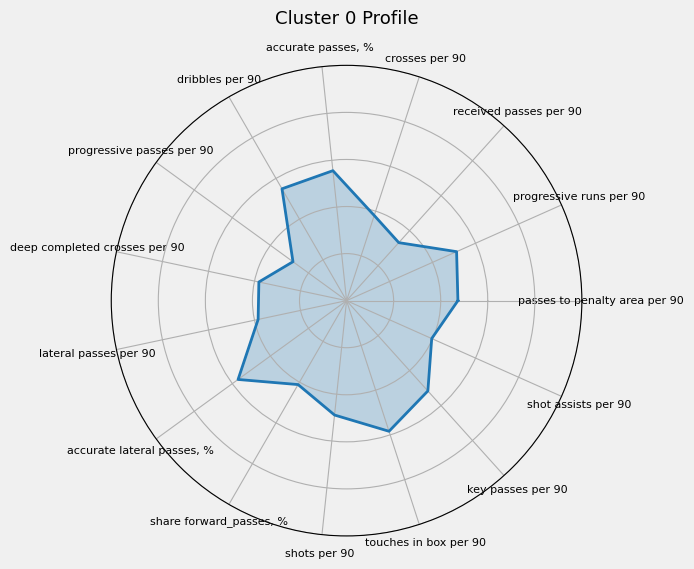

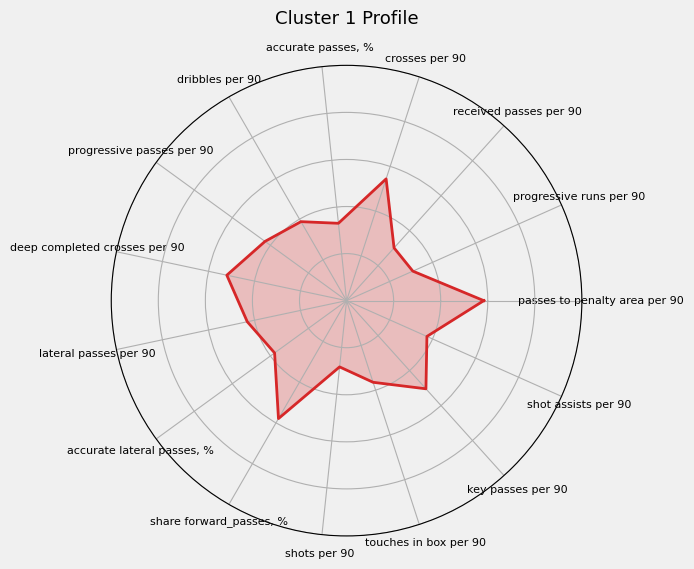

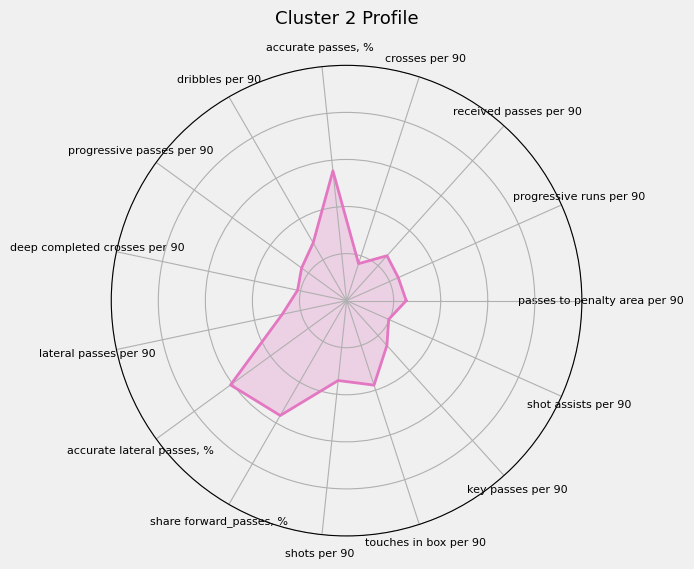

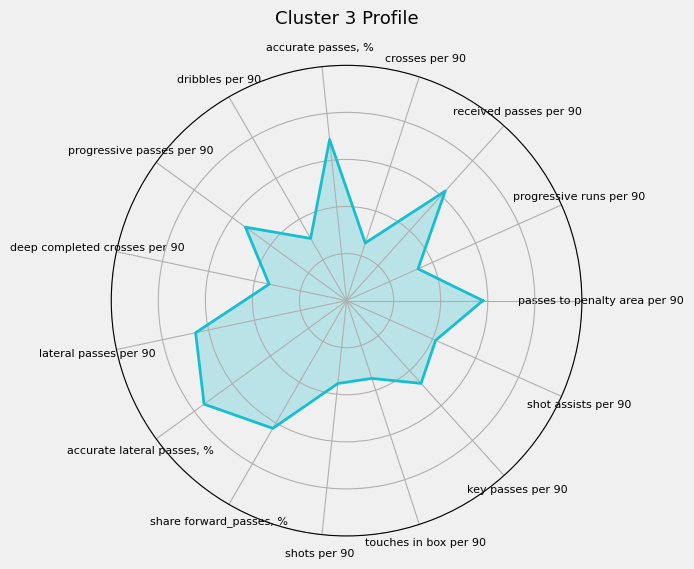

In [183]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Bakgrunnsfarge
background_color = '#f0f0f0'

# Hent metrics og vinkler
metrics = cluster_profile_df['metric'].tolist()
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # lukker sirkelen

# Plot radar for hver cluster
for cluster_id in cluster_ids:
    values = cluster_profile_df[cluster_id].values
    values = np.concatenate((values, [values[0]]))  # lukker polygonen

    fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))
    fig.patch.set_facecolor(background_color)
    ax.set_facecolor(background_color)

    color = cluster_colors[cluster_id]

    ax.plot(angles, values, color=color, linewidth=2)
    ax.fill(angles, values, color=color, alpha=0.25)

    # Akse-etiketter
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics, fontsize=8)

    # Y-akse tilpasses litt penere
    ax.set_yticklabels([])
    ax.set_ylim(0, 1)

    # Tittel
    ax.set_title(f'Cluster {cluster_id} Profile', pad=30, fontsize=13)

    plt.tight_layout()

    # Lagre figur
    filename = f'Radar_Cluster{cluster_id}.png'
    plt.savefig(os.path.join(save_dir, filename), dpi=400, bbox_inches='tight')
    plt.show()
    plt.close()


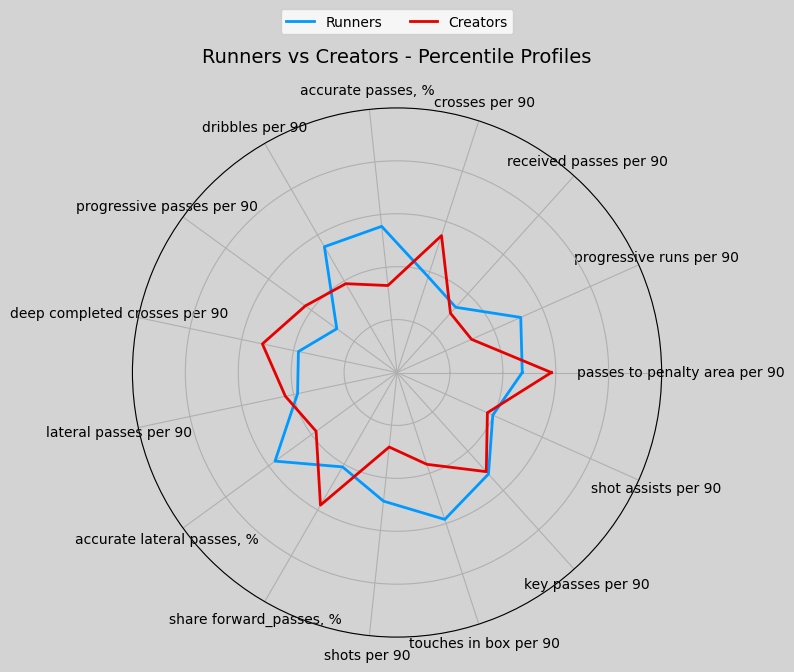

In [191]:
import numpy as np
import matplotlib.pyplot as plt
import os

# ----------- Parametre -------------------

# Farger
cluster_colors = {0: '#0099FF', 1: '#E60000'}

# Cluster ID-ene du vil sammenligne
cluster0_id = 0
cluster1_id = 1

# Output path
output_path = r"C:\Users\henri\Desktop\Fotballanalyser\ML\Clustering\Visuals\comparison-cluster0-cluster1.jpg"

# ----------- Hent data -------------------

# Metrics (i riktig rekkefølge)
metrics = cluster_profile_df['metric'].tolist()

# Verdier for cluster 0 og cluster 1 (percentiler, skalert til 0-100 hvis de er 0-1)
cluster0_values = (cluster_profile_df[cluster0_id].values * 100).tolist()
cluster1_values = (cluster_profile_df[cluster1_id].values * 100).tolist()

# Lukker polygonen
cluster0_values += cluster0_values[:1]
cluster1_values += cluster1_values[:1]

# Vinkler
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]

# ----------- Lag radarplot -------------------

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Sett lys grå bakgrunn
fig.patch.set_facecolor('lightgray')
ax.set_facecolor('lightgray')

# Plot linjene (ingen fyll)
ax.plot(angles, cluster0_values, color=cluster_colors[cluster0_id], linewidth=2, linestyle='-', label=f'Runners')
ax.plot(angles, cluster1_values, color=cluster_colors[cluster1_id], linewidth=2, linestyle='-', label=f'Creators')

# Fjern y-akse etiketter og sett skala 0-100
ax.set_yticklabels([])
ax.set_ylim(0, 100)

# Sett x-akse etiketter (metrics)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics, color='black', size=10)

# Tittel og legende
ax.set_title(f"Runners vs Creators - Percentile Profiles", size=14, color="black", va='bottom', pad=30)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2)

plt.tight_layout()

# Lagre og vis
plt.savefig(output_path, dpi=400, bbox_inches='tight')
plt.show()
plt.close()


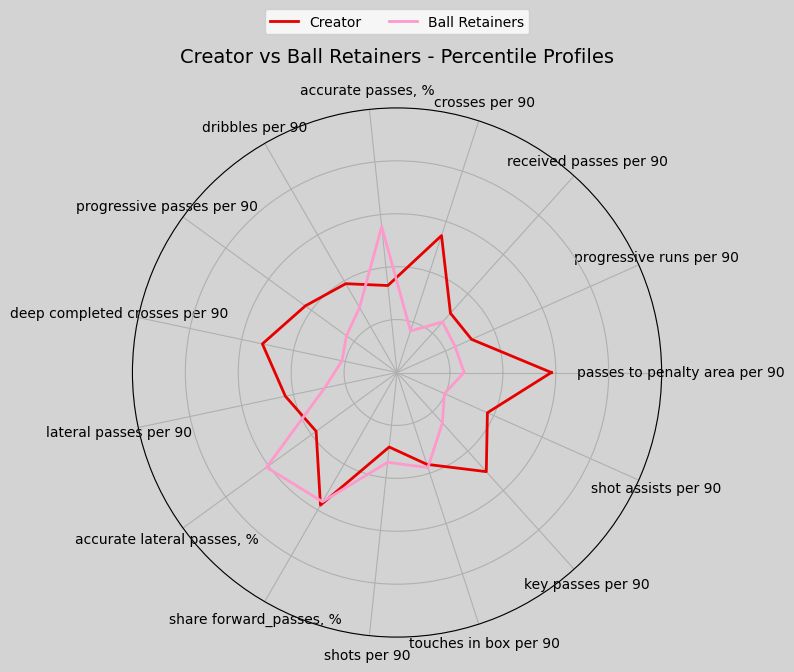

In [201]:
import numpy as np
import matplotlib.pyplot as plt
import os

# ----------- Parametre -------------------

# Navn for ALLE clusters (IDene 0, 1, 2)
cluster_names = {
    0: "Wide Threat",
    1: "Creator",
    2: "Ball Retainers"
}

# Farger KNYTTET TIL NAVN (ikke ID)
role_colors = {
    "Wide Threat": '#3399ff',   # Blå
    "Creator": '#E60000',       # Rød
    "Ball Retainers": '#ff99cc' # Rosa
}

# Cluster ID-ene du vil sammenligne (bytt disse for å sammenligne andre)
cluster0_id = 1   # Creator
cluster1_id = 2   # Ball Retainers

# Output path (valgfritt)
output_path = r"C:\Users\henri\Desktop\Fotballanalyser\ML\Clustering\Visuals\comparison-cluster1-cluster2.jpg"

# ----------- Hent data -------------------

# Metrics (i riktig rekkefølge)
metrics = cluster_profile_df['metric'].tolist()

# Verdier for cluster 0 og cluster 1 (percentiler, skalert til 0-100 hvis de er 0-1)
cluster0_values = (cluster_profile_df[cluster0_id].values * 100).tolist()
cluster1_values = (cluster_profile_df[cluster1_id].values * 100).tolist()

# Lukker polygonen
cluster0_values += cluster0_values[:1]
cluster1_values += cluster1_values[:1]

# Vinkler
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]

# Hent navnene til cluster0 og cluster1
cluster0_name = cluster_names[cluster0_id]
cluster1_name = cluster_names[cluster1_id]

# Hent fargene basert på navn (rolle)
cluster0_color = role_colors[cluster0_name]
cluster1_color = role_colors[cluster1_name]

# ----------- Lag radarplot -------------------

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Sett lys grå bakgrunn
fig.patch.set_facecolor('lightgray')
ax.set_facecolor('lightgray')

# Plot linjene (ingen fyll)
ax.plot(angles, cluster0_values, color=cluster0_color, linewidth=2, linestyle='-', label=cluster0_name)
ax.plot(angles, cluster1_values, color=cluster1_color, linewidth=2, linestyle='-', label=cluster1_name)

# Fjern y-akse etiketter og sett skala 0-100
ax.set_yticklabels([])
ax.set_ylim(0, 100)

# Sett x-akse etiketter (metrics)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics, color='black', size=10)

# Tittel og legende (vis navnene til valgte clusters)
title = f"{cluster0_name} vs {cluster1_name} - Percentile Profiles"
ax.set_title(title, size=14, color="black", va='bottom', pad=30)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2)

plt.tight_layout()

# Lagre og vis
plt.savefig(output_path, dpi=400, bbox_inches='tight')
plt.show()
plt.close()


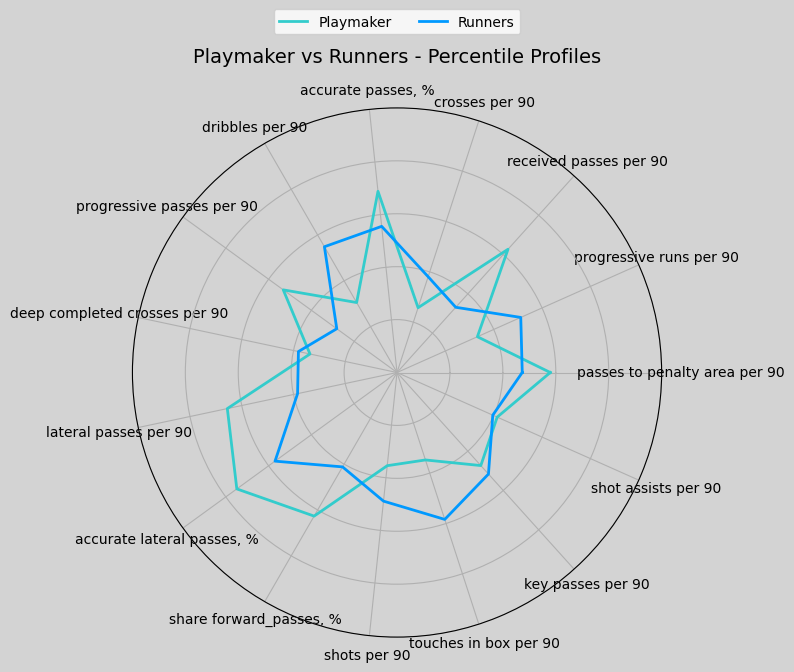

In [203]:
import numpy as np
import matplotlib.pyplot as plt
import os

# ----------- Parametre -------------------

# Navn for ALLE clusters (IDene 0, 1, 2, 3)
cluster_names = {
    0: "Runners",
    1: "Creator",
    2: "Ball Retainers",
    3: "Playmaker"
}

# Farger KNYTTET TIL NAVN (ikke ID)
role_colors = {
    "Wide Threat": '#3399ff',    # Blå
    "Creator": '#E60000',        # Rød
    "Ball Retainers": '#ff99cc', # Rosa
    "Playmaker": '#33CCCC',      # Turkis
    "Runners": '#0099FF'         # Mørk blå
}

# Cluster ID-ene du vil sammenligne (bytt disse for å sammenligne andre)
cluster0_id = 3   # Playmaker
cluster1_id = 0   # Runners

# Output path (valgfritt)
output_path = r"C:\Users\henri\Desktop\Fotballanalyser\ML\Clustering\Visuals\comparison-cluster3-cluster0.jpg"

# ----------- Hent data -------------------

# Metrics (i riktig rekkefølge)
metrics = cluster_profile_df['metric'].tolist()

# Verdier for cluster 0 og cluster 1 (percentiler, skalert til 0-100 hvis de er 0-1)
cluster0_values = (cluster_profile_df[cluster0_id].values * 100).tolist()
cluster1_values = (cluster_profile_df[cluster1_id].values * 100).tolist()

# Lukker polygonen
cluster0_values += cluster0_values[:1]
cluster1_values += cluster1_values[:1]

# Vinkler
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]

# Hent navnene til cluster0 og cluster1
cluster0_name = cluster_names[cluster0_id]
cluster1_name = cluster_names[cluster1_id]

# Hent fargene basert på navn (rolle)
cluster0_color = role_colors[cluster0_name]
cluster1_color = role_colors[cluster1_name]

# ----------- Lag radarplot -------------------

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Sett lys grå bakgrunn
fig.patch.set_facecolor('lightgray')
ax.set_facecolor('lightgray')

# Plot linjene (ingen fyll)
ax.plot(angles, cluster0_values, color=cluster0_color, linewidth=2, linestyle='-', label=cluster0_name)
ax.plot(angles, cluster1_values, color=cluster1_color, linewidth=2, linestyle='-', label=cluster1_name)

# Fjern y-akse etiketter og sett skala 0-100
ax.set_yticklabels([])
ax.set_ylim(0, 100)

# Sett x-akse etiketter (metrics)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics, color='black', size=10)

# Tittel og legende (vis navnene til valgte clusters)
title = f"{cluster0_name} vs {cluster1_name} - Percentile Profiles"
ax.set_title(title, size=14, color="black", va='bottom', pad=30)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2)

plt.tight_layout()

# Lagre og vis
plt.savefig(output_path, dpi=400, bbox_inches='tight')
plt.show()
plt.close()


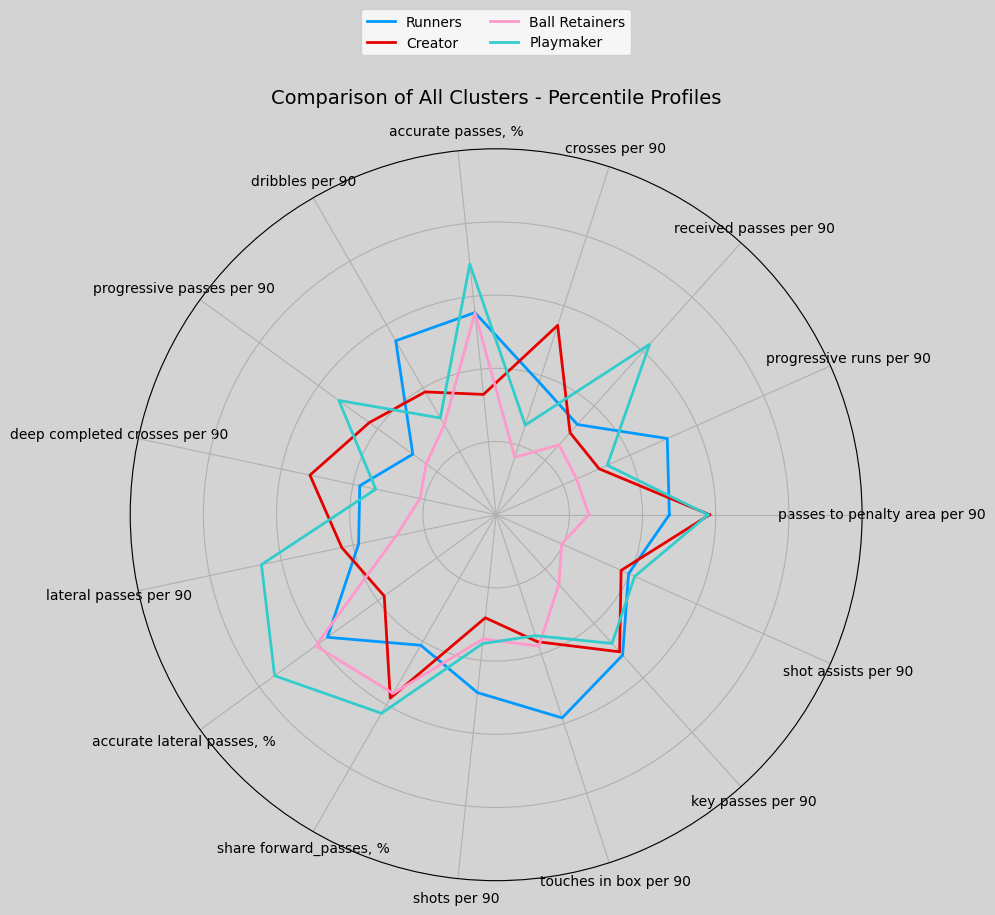

In [205]:
import numpy as np
import matplotlib.pyplot as plt
import os

# ----------- Parametre -------------------

# Navn for ALLE clusters (IDene 0, 1, 2, 3)
cluster_names = {
    0: "Runners",
    1: "Creator",
    2: "Ball Retainers",
    3: "Playmaker"
}

# Farger KNYTTET TIL NAVN (ikke ID)
role_colors = {
    "Wide Threat": '#3399ff',    # Blå
    "Creator": '#E60000',        # Rød
    "Ball Retainers": '#ff99cc', # Rosa
    "Playmaker": '#33CCCC',      # Turkis
    "Runners": '#0099FF'         # Mørk blå
}

# Alle cluster IDs vi vil sammenligne
cluster_ids = [0, 1, 2, 3]

# Output path (valgfritt)
output_path = r"C:\Users\henri\Desktop\Fotballanalyser\ML\Clustering\Visuals\comparison-all-clusters.jpg"

# ----------- Hent data -------------------

# Metrics (i riktig rekkefølge)
metrics = cluster_profile_df['metric'].tolist()

# Vinkler
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]

# ----------- Lag radarplot -------------------

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Sett lys grå bakgrunn
fig.patch.set_facecolor('lightgray')
ax.set_facecolor('lightgray')

# Loop gjennom alle clusters og plott linjene
for cluster_id in cluster_ids:
    cluster_name = cluster_names[cluster_id]
    cluster_color = role_colors[cluster_name]
    
    # Hent verdier og skaler
    values = (cluster_profile_df[cluster_id].values * 100).tolist()
    values += values[:1]  # lukk polygon
    
    # Plot linje
    ax.plot(angles, values, color=cluster_color, linewidth=2, linestyle='-', label=cluster_name)

# Fjern y-akse etiketter og sett skala 0-100
ax.set_yticklabels([])
ax.set_ylim(0, 100)

# Sett x-akse etiketter (metrics)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics, color='black', size=10)

# Tittel og legende (vis navnene til valgte clusters)
title = f"Comparison of All Clusters - Percentile Profiles"
ax.set_title(title, size=14, color="black", va='bottom', pad=30)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2)

plt.tight_layout()

# Lagre og vis
#plt.savefig(output_path, dpi=400, bbox_inches='tight')
plt.show()
plt.close()
